###############################################################################################################

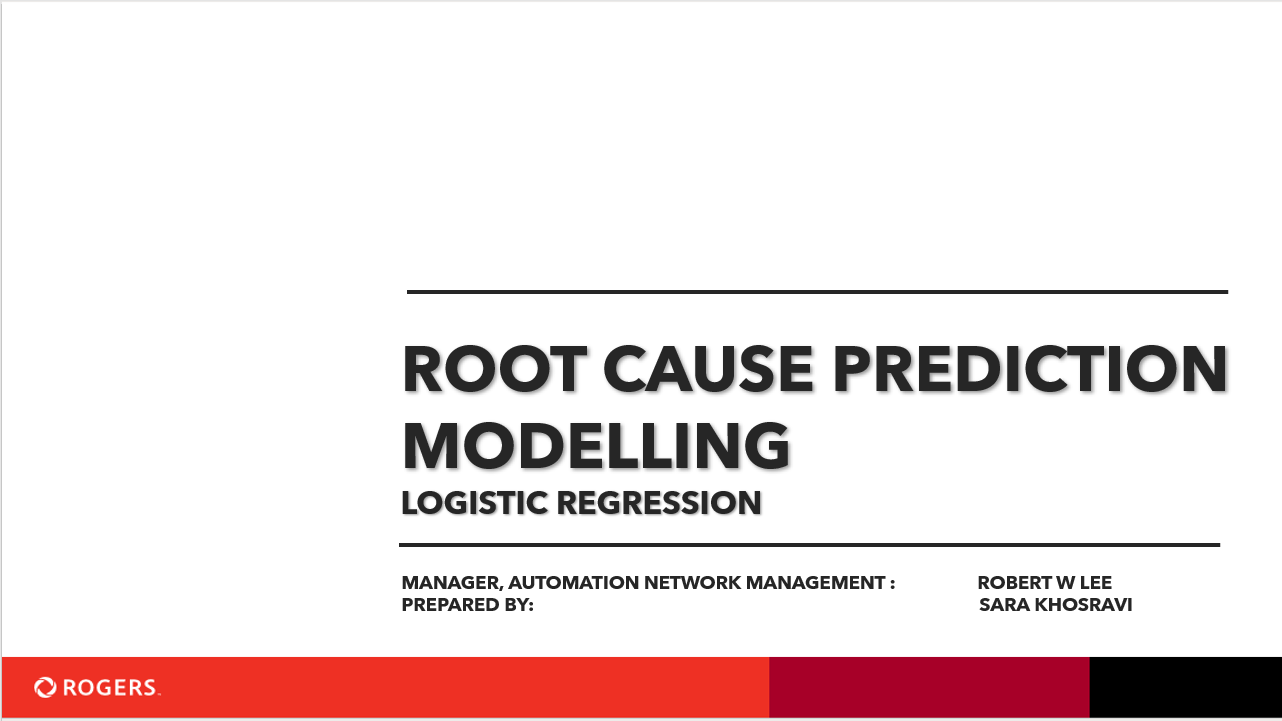

## 1. Introduction
###############################################################################################################################

### 1.1. Problem Statement

## 2. DATA COLLECTION

###############################################################################################################################

### 2.1. Connect to dataset

In [1]:
# SETTING UP WORKING DIRECTORY
import os
os.getcwd()
os.chdir(r'C:\Users\sara.khosravi\Documents\Sara\Data Analysis\ML')
os.getcwd()

'C:\\Users\\sara.khosravi\\Documents\\Sara\\Data Analysis\\ML'

### 2.2. combine the datasets

In [2]:
# IMPORTING PACKAGES AND LIBRARIES
import warnings
warnings.filterwarnings('ignore')

#import libraries for the data-structures
# Importing the numpy and pandas package
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

#import sys
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#import pandas_profiling


# EDA Package
#!pip install sweetviz
#import sweetviz as sv

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

!pip3 install plotly
import plotly
import plotly.figure_factory as ff

from datetime import datetime
from matplotlib import dates
from datetime import datetime
import time

import statsmodels.api as sm
from scipy.stats import norm

#import libraries for modeling
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import math
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.tree import plot_tree
from sklearn.linear_model import LassoCV 
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingRegressor
!pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report

print('Libraries imported and installed.')

Libraries imported and installed.


In [3]:
# a list with all missing value formats
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]


In [4]:
#Read files:

# READING THE DATA

#Row data for Train
df = pd.read_excel(r'C:\Users\sara.khosravi\Documents\Sara\Data Analysis\ML\Data\Raw_Data_YTD _2022-04-04.xlsx',na_values=missing_value_formats)
print(df.shape)

#ESAP 
dfesap = pd.read_excel(r'C:\Users\sara.khosravi\Documents\Sara\Data Analysis\ML\Data\ESAP.xlsx',na_values=missing_value_formats)
print(dfesap.shape)

#Test Data for Current Month
dftest = pd.read_excel(r'C:\Users\sara.khosravi\Documents\Sara\Data Analysis\ML\Data\Raw_Data__2022-04-04.xlsx',na_values=missing_value_formats)
print(dftest.shape)

(97001, 18)
(6762, 8)
(6283, 18)


In [5]:
# UNDERSTANDING THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97001 entries, 0 to 97000
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Imt Id                     97001 non-null  object        
 1   Create Date                97001 non-null  datetime64[ns]
 2   Rule Name                  97001 non-null  object        
 3   Root Cause                 87215 non-null  object        
 4   Resolution                 91311 non-null  object        
 5   Recovery Prime             71950 non-null  object        
 6   Workflow State             52472 non-null  object        
 7   Incident Start             97001 non-null  datetime64[ns]
 8   Incident End               91403 non-null  datetime64[ns]
 9   Duration of Incident       92684 non-null  object        
 10  Target Time To Restore     95904 non-null  datetime64[ns]
 11  Event Source               97001 non-null  object        
 12  Resp

In [6]:
# UNDERSTANDING THE DATASET
dfesap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rule Name              6762 non-null   object
 1   Automation Name (Bot)  654 non-null    object
 2   Automation Suite Name  654 non-null    object
 3   Team Name              6762 non-null   object
 4   Automation Type        654 non-null    object
 5   Automation Status      654 non-null    object
 6   Automation Framework   6762 non-null   object
 7   Auto-Dispatch To       936 non-null    object
dtypes: object(8)
memory usage: 422.8+ KB


In [7]:
# UNDERSTANDING THE DATASET
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283 entries, 0 to 6282
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Imt Id                     6283 non-null   object        
 1   Create Date                6283 non-null   datetime64[ns]
 2   Rule Name                  6283 non-null   object        
 3   Root Cause                 5082 non-null   object        
 4   Resolution                 5340 non-null   object        
 5   Recovery Prime             3962 non-null   object        
 6   Workflow State             3013 non-null   object        
 7   Incident Start             6283 non-null   datetime64[ns]
 8   Incident End               5341 non-null   datetime64[ns]
 9   Duration of Incident       5998 non-null   object        
 10  Target Time To Restore     6107 non-null   datetime64[ns]
 11  Event Source               6283 non-null   object        
 12  Respon

In [8]:
# UNDERSTANDING THE DATASET
df

,Imt Id,Create Date,Rule Name,Root Cause,Resolution,Recovery Prime,Workflow State,Incident Start,Incident End,Duration of Incident,Target Time To Restore,Event Source,Responsibility,Responsibility Department,State,Status,Submitter,Submitter Department
0,IMT.2112.043195,2022-01-01 00:02:31,UMTS UL RSSI -85dBm,Cause Not Identified,Network / Service Validated,Field Resolved,NaN,2022-01-01 00:00:03,2022-01-11 16:24:39,"10 days, 16 Hrs, 24 Minutes",2022-01-08 00:00:03,ESAP-AUTO,Ops Cable and Wireless Ontario,Field Ops Wireless SWO,Closed,Closed,FOPS_CENTRALSOUTH,Field Ops Wireless SWO
1,IMT.2112.043196,2022-01-01 00:03:41,BMC - IUM Evolution - Parameter Count changed ...,Software Failure,Network / Service Validated,NOC Resolved,NaN,2021-12-31 23:50:35,2022-01-01 00:37:21,"0 days, 0 Hrs, 46 Minutes",2022-01-03 23:50:35,ESAP-AUTO,NOC,NOC Data Voice and Enhanced Services,Closed,Closed,ESAP,Automation
2,IMT.2112.043197,2022-01-01 00:06:41,TLAN_HVAC_Failure,Hardware Failure,Network / Service Validated,Field Resolved,NaN,2022-01-01 00:05:24,2022-01-05 16:17:24,"4 days, 16 Hrs, 12 Minutes",2022-01-08 00:05:24,ESAP-AUTO,Ops Cable and Wireless GTA,Ops Wireless GTA West,Closed,Closed,ESAP,Automation
3,IMT.2112.043198,2022-01-01 00:09:38,SB_SYNTH_IPTV - Medius - Critical,Broadcast Source,Source Restored,NOC Resolved,NaN,2022-01-01 00:02:29,2022-01-01 07:57:32,"0 days, 7 Hrs, 55 Minutes",2022-01-08 00:02:29,ESAP-AUTO,NOC,NOC Digital Video and Hosted Services,Closed,Closed,ESAP,Automation
4,IMT.2112.043199,2022-01-01 00:09:43,CCAP - CASA System Monitoring UPS Switch over,Software Failure,Re-Set,NOC Resolved,Requires Specialist,2021-12-31 02:48:48,2022-01-02 05:58:14,"2 days, 3 Hrs, 9 Minutes",2022-01-03 02:48:48,ESAP-AUTO,NOC,NOC Enterprise and Core Data,Closed,Closed,ESAP,Automation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96996,IMT.2204.002571,2022-04-03 23:43:10,MiniLinkTN_SNMP_Reserved Position,NaN,NaN,NaN,NaN,2022-04-03 22:40:34,NaT,"0 days, 9 Hrs, 58 Minutes",NaT,ESAP-AUTO,Ops Cable and Wireless Ontario,Field Ops Wireless Eastern Ontario,New,New,FOPS_CENTRALEAST,Field Ops Wireless Eastern Ontario
96997,IMT.2204.002572,2022-04-03 23:45:10,SB_SYNTH_IPRAN Link Down,No Fault Found,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:42:45,2022-04-04 00:00:12,"0 days, 0 Hrs, 17 Minutes",2022-04-06 23:42:45,ESAP-AUTO,NOC,NOC IM and HFC_RAN,Closed,Closed,ESAP,Automation
96998,IMT.2204.002574,2022-04-03 23:49:06,SB_SYNTH_IPRAN Link Down,No Fault Found,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:48:12,2022-04-04 00:02:45,"0 days, 0 Hrs, 14 Minutes",2022-04-06 23:48:12,ESAP-AUTO,NOC,NOC IM and HFC_RAN,Closed,Closed,ESAP,Automation
96999,IMT.2204.002575,2022-04-03 23:52:11,Core Security - peakflowSPTraps CRITICAL,Security Issue,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:50:07,2022-04-04 01:37:10,"0 days, 1 Hrs, 47 Minutes",2022-04-10 23:50:07,ESAP-AUTO,NOC,NOC Enterprise and Core Data,Closed,Closed,ESAP,Automation


In [9]:
# UNDERSTANDING THE DATASET
dfesap

,Rule Name,Automation Name (Bot),Automation Suite Name,Team Name,Automation Type,Automation Status,Automation Framework,Auto-Dispatch To
0,100199_Intrusion - Critical ATL,NaN,NaN,NOC IM and HFC_RAN,NaN,NaN,Unexpected Value,NaN
1,100199_Intrusion - Critical Midwest,NaN,NaN,NOC IM and HFC_RAN,NaN,NaN,Unexpected Value,NaN
2,100199_Intrusion - Critical - QC,NaN,NaN,NOC IM and HFC_RAN,NaN,NaN,Unexpected Value,NaN
3,5G_Antenna Calibration DL Failure,NaN,NaN,NOC IM and HFC_RAN,NaN,NaN,Unexpected Value,Auto assign to site prime department
4,5G_Antenna Calibration UL Failure,NaN,NaN,NOC IM and HFC_RAN,NaN,NaN,Unexpected Value,Auto assign to site prime department
...,...,...,...,...,...,...,...,...
6757,zHCL_Batch_38,NaN,NaN,HCL-INFRA-GOC,NaN,NaN,Unexpected Value,RSO-VST-COMMISSIONS
6758,peakflowSPTraps - CRITICAL,DIAGNOSTIC-ARBOR-ALARM,Arbor-Alarm,NOC Enterprise and Core Data,Diagnostic,enabled,TAF,NaN
6759,peakflowTraps,NaN,NaN,NOC Enterprise and Core Data,NaN,NaN,Unexpected Value,NaN
6760,TLAN Generator Run,DIAGNOSTIC-TLAN-GENERATOR-RUN,TLAN-Temperature,NOC IM and HFC_RAN,Diagnostic,enabled,TAF,NaN


In [10]:
# UNDERSTANDING THE DATASET
dftest

,Imt Id,Create Date,Rule Name,Root Cause,Resolution,Recovery Prime,Workflow State,Incident Start,Incident End,Duration of Incident,Target Time To Restore,Event Source,Responsibility,Responsibility Department,State,Status,Submitter,Submitter Department
0,IMT.2203.039717,2022-03-28 00:07:53,Ericsson LTE_Inter Node Feature Incompatibility,Provisioning,Reconfigured,TAC Resolved,Requires Specialist,2022-03-27 23:05:59,2022-03-29 14:49:56,"1 days, 15 Hrs, 43 Minutes",2022-04-03 23:05:59,ESAP-AUTO,Wireless Access Planning,Radio Technical Assistance Centre,Closed,Closed,ESAP,Automation
1,IMT.2203.039718,2022-03-28 00:20:48,SDE Core - Infoblox AuthDNS - Critical - Proce...,Automation,Network/Service Validation,Automation,Closed by Auto Diag,2022-03-28 00:18:57,2022-03-28 00:31:00,"0 days, 0 Hrs, 12 Minutes",2022-04-04 00:18:57,ESAP-AUTO,NOC,NOC Enterprise and Core Data,Closed,Closed,ESAP,Automation
2,IMT.2203.039719,2022-03-28 00:22:51,SDE Core - Infoblox AuthDNS - Critical - Proce...,Automation,Network/Service Validation,Automation,Closed by Auto Diag,2022-03-28 00:21:09,2022-03-28 00:33:30,"0 days, 0 Hrs, 12 Minutes",2022-04-04 00:21:09,ESAP-AUTO,NOC,NOC Enterprise and Core Data,Closed,Closed,ESAP,Automation
3,IMT.2203.039720,2022-03-28 00:22:55,SDE Core - Infoblox AuthDNS - Critical - Proce...,Automation,Network/Service Validation,Automation,Closed by Auto Diag,2022-03-28 00:20:23,2022-03-28 00:33:57,"0 days, 0 Hrs, 13 Minutes",2022-04-04 00:20:23,ESAP-AUTO,NOC,NOC Enterprise and Core Data,Closed,Closed,ESAP,Automation
4,IMT.2203.039721,2022-03-28 00:23:50,Site Commercial Power Failure_GTA,Commercial Power Failure,Hydro Restored,NOC Resolved,Requires Specialist,2022-03-28 00:11:08,2022-03-28 01:43:33,"0 days, 1 Hrs, 32 Minutes",2022-04-04 00:11:08,ESAP-AUTO,NOC,NOC IM and HFC_RAN,Closed,Closed,ESAP,Automation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6278,IMT.2204.002571,2022-04-03 23:43:10,MiniLinkTN_SNMP_Reserved Position,NaN,NaN,NaN,NaN,2022-04-03 22:40:34,NaT,"0 days, 9 Hrs, 58 Minutes",NaT,ESAP-AUTO,Ops Cable and Wireless Ontario,Field Ops Wireless Eastern Ontario,New,New,FOPS_CENTRALEAST,Field Ops Wireless Eastern Ontario
6279,IMT.2204.002572,2022-04-03 23:45:10,SB_SYNTH_IPRAN Link Down,No Fault Found,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:42:45,2022-04-04 00:00:12,"0 days, 0 Hrs, 17 Minutes",2022-04-06 23:42:45,ESAP-AUTO,NOC,NOC IM and HFC_RAN,Closed,Closed,ESAP,Automation
6280,IMT.2204.002574,2022-04-03 23:49:06,SB_SYNTH_IPRAN Link Down,No Fault Found,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:48:12,2022-04-04 00:02:45,"0 days, 0 Hrs, 14 Minutes",2022-04-06 23:48:12,ESAP-AUTO,NOC,NOC IM and HFC_RAN,Closed,Closed,ESAP,Automation
6281,IMT.2204.002575,2022-04-03 23:52:11,Core Security - peakflowSPTraps CRITICAL,Security Issue,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:50:07,2022-04-04 01:37:10,"0 days, 1 Hrs, 47 Minutes",2022-04-10 23:50:07,ESAP-AUTO,NOC,NOC Enterprise and Core Data,Closed,Closed,ESAP,Automation


In [11]:
# MAPPING 

df_esap= df.join(dfesap.set_index('Rule Name'), on='Rule Name')
df_esap
train=df_esap

In [12]:
data= df_esap

### 2.3. Find the top 10 records

In [13]:
#getting number of rows(obs)
data.shape[0]

97100

In [14]:
#getting number of collumns
data.shape[1]

25

In [15]:
#df2=df #copy by refrences
# getting copy of data ( copy by value)
#method1:
data_orginal=data.copy()
#method2:
data_orginal2=data[:]

In [16]:
data=data.iloc[:97100, :]
data.shape

(97100, 25)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97100 entries, 0 to 97000
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Imt Id                     97100 non-null  object        
 1   Create Date                97100 non-null  datetime64[ns]
 2   Rule Name                  97100 non-null  object        
 3   Root Cause                 87310 non-null  object        
 4   Resolution                 91410 non-null  object        
 5   Recovery Prime             72045 non-null  object        
 6   Workflow State             52571 non-null  object        
 7   Incident Start             97100 non-null  datetime64[ns]
 8   Incident End               91502 non-null  datetime64[ns]
 9   Duration of Incident       92778 non-null  object        
 10  Target Time To Restore     96003 non-null  datetime64[ns]
 11  Event Source               97100 non-null  object        
 12  Resp

In [18]:
#making a copy of data before preprocessing
data_raw=data.copy()

### 2.4. Describe Dataset

In [19]:
data.describe()

,Imt Id,Create Date,Rule Name,Root Cause,Resolution,Recovery Prime,Workflow State,Incident Start,Incident End,Duration of Incident,...,Status,Submitter,Submitter Department,Automation Name (Bot),Automation Suite Name,Team Name,Automation Type,Automation Status,Automation Framework,Auto-Dispatch To
count,97100,97100,97100,87310,91410,72045,52571,97100,91502,92778,...,97100,97100,97100,55896,55896,95207,55896,55896,95207,17795
unique,97001,96951,1831,32,38,7,6,66664,87833,10559,...,4,12,12,100,99,6,2,1,2,19
top,IMT.2201.018303,2022-01-14 23:51:40,CCAP - CASA System Monitoring UPS Switch over,Automation,Network / Service Validated,NOC Resolved,Requires Specialist,2022-02-24 01:22:02,2022-03-02 10:03:14,"0 days, 0 Hrs, 14 Minutes",...,Closed,ESAP,Automation,DIAGNOSTIC-CASA-UPS-SWITCH-OVER,Casa-UPS-Switch-Over,NOC IM and HFC_RAN,Diagnostic,enabled,TAF,Auto assign to site prime department
freq,2,2,8789,15974,34748,35008,35629,95,41,837,...,91263,91193,91193,8789,8789,47130,52728,55896,55896,10513
first,NaN,2022-01-01 00:02:31,NaN,NaN,NaN,NaN,NaN,2018-03-29 19:19:35,2018-03-29 19:19:35,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-04-03 23:53:10,NaN,NaN,NaN,NaN,NaN,2022-04-03 23:50:07,2022-04-04 08:38:37,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


pandas_profiling.ProfileReport(data)

=======================================================================================================================

# ---------------------------------------------  PART ONE   ----------------------------------------------

========================================================================================================================

# 3. Data Preprocessing

###############################################################################################################################



## ''''''''''''''''''''''''''''''''''''''''''''''''' Data Exploration Analyasis Step One '''''''''''''''''''''''''''''''''''''''''''''''''''

## ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

## 4. Data Exploration Analyasis Step " ONE"

###############################################################################################################################

### 4.1. Handling Duplicate Data

#### 4.1.1. Handling Duplicate Observation

In [20]:
data=data.drop_duplicates()

### 4.2. Handling Missing Values

#### 4.2.1. Sorting Data by Date

###### --Sort by date help us to filling missing value reasnable

In [21]:
data.sort_values(by="Create Date" , ascending=True)

,Imt Id,Create Date,Rule Name,Root Cause,Resolution,Recovery Prime,Workflow State,Incident Start,Incident End,Duration of Incident,...,Status,Submitter,Submitter Department,Automation Name (Bot),Automation Suite Name,Team Name,Automation Type,Automation Status,Automation Framework,Auto-Dispatch To
0,IMT.2112.043195,2022-01-01 00:02:31,UMTS UL RSSI -85dBm,Cause Not Identified,Network / Service Validated,Field Resolved,NaN,2022-01-01 00:00:03,2022-01-11 16:24:39,"10 days, 16 Hrs, 24 Minutes",...,Closed,FOPS_CENTRALSOUTH,Field Ops Wireless SWO,NaN,NaN,NOC IM and HFC_RAN,NaN,NaN,Unexpected Value,Auto assign to site prime department
1,IMT.2112.043196,2022-01-01 00:03:41,BMC - IUM Evolution - Parameter Count changed ...,Software Failure,Network / Service Validated,NOC Resolved,NaN,2021-12-31 23:50:35,2022-01-01 00:37:21,"0 days, 0 Hrs, 46 Minutes",...,Closed,ESAP,Automation,NaN,NaN,NOC Data Voice and Enhanced Services,NaN,NaN,Unexpected Value,NaN
2,IMT.2112.043197,2022-01-01 00:06:41,TLAN_HVAC_Failure,Hardware Failure,Network / Service Validated,Field Resolved,NaN,2022-01-01 00:05:24,2022-01-05 16:17:24,"4 days, 16 Hrs, 12 Minutes",...,Closed,ESAP,Automation,NaN,NaN,NOC IM and HFC_RAN,NaN,NaN,Unexpected Value,Auto assign to site prime department
3,IMT.2112.043198,2022-01-01 00:09:38,SB_SYNTH_IPTV - Medius - Critical,Broadcast Source,Source Restored,NOC Resolved,NaN,2022-01-01 00:02:29,2022-01-01 07:57:32,"0 days, 7 Hrs, 55 Minutes",...,Closed,ESAP,Automation,NaN,NaN,NOC Digital Video and Hosted Services,NaN,NaN,Unexpected Value,NaN
4,IMT.2112.043199,2022-01-01 00:09:43,CCAP - CASA System Monitoring UPS Switch over,Software Failure,Re-Set,NOC Resolved,Requires Specialist,2021-12-31 02:48:48,2022-01-02 05:58:14,"2 days, 3 Hrs, 9 Minutes",...,Closed,ESAP,Automation,DIAGNOSTIC-CASA-UPS-SWITCH-OVER,Casa-UPS-Switch-Over,NOC Enterprise and Core Data,Diagnostic,enabled,TAF,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96996,IMT.2204.002571,2022-04-03 23:43:10,MiniLinkTN_SNMP_Reserved Position,NaN,NaN,NaN,NaN,2022-04-03 22:40:34,NaT,"0 days, 9 Hrs, 58 Minutes",...,New,FOPS_CENTRALEAST,Field Ops Wireless Eastern Ontario,NaN,NaN,NOC IM and HFC_RAN,NaN,NaN,Unexpected Value,Auto assign to site prime department
96997,IMT.2204.002572,2022-04-03 23:45:10,SB_SYNTH_IPRAN Link Down,No Fault Found,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:42:45,2022-04-04 00:00:12,"0 days, 0 Hrs, 17 Minutes",...,Closed,ESAP,Automation,DIAGNOSTIC-IPRAN-SYNTH-LINK-DOWN-CORRELATED-AL...,IPRAN-SYNTH-Link-Down-Correlated-Alarm,NOC IM and HFC_RAN,Diagnostic,enabled,TAF,NaN
96998,IMT.2204.002574,2022-04-03 23:49:06,SB_SYNTH_IPRAN Link Down,No Fault Found,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:48:12,2022-04-04 00:02:45,"0 days, 0 Hrs, 14 Minutes",...,Closed,ESAP,Automation,DIAGNOSTIC-IPRAN-SYNTH-LINK-DOWN-CORRELATED-AL...,IPRAN-SYNTH-Link-Down-Correlated-Alarm,NOC IM and HFC_RAN,Diagnostic,enabled,TAF,NaN
96999,IMT.2204.002575,2022-04-03 23:52:11,Core Security - peakflowSPTraps CRITICAL,Security Issue,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:50:07,2022-04-04 01:37:10,"0 days, 1 Hrs, 47 Minutes",...,Closed,ESAP,Automation,DIAGNOSTIC-ARBOR-ALARM,Arbor-Alarm,NOC Enterprise and Core Data,Diagnostic,enabled,TAF,NaN


In [22]:
df

,Imt Id,Create Date,Rule Name,Root Cause,Resolution,Recovery Prime,Workflow State,Incident Start,Incident End,Duration of Incident,Target Time To Restore,Event Source,Responsibility,Responsibility Department,State,Status,Submitter,Submitter Department
0,IMT.2112.043195,2022-01-01 00:02:31,UMTS UL RSSI -85dBm,Cause Not Identified,Network / Service Validated,Field Resolved,NaN,2022-01-01 00:00:03,2022-01-11 16:24:39,"10 days, 16 Hrs, 24 Minutes",2022-01-08 00:00:03,ESAP-AUTO,Ops Cable and Wireless Ontario,Field Ops Wireless SWO,Closed,Closed,FOPS_CENTRALSOUTH,Field Ops Wireless SWO
1,IMT.2112.043196,2022-01-01 00:03:41,BMC - IUM Evolution - Parameter Count changed ...,Software Failure,Network / Service Validated,NOC Resolved,NaN,2021-12-31 23:50:35,2022-01-01 00:37:21,"0 days, 0 Hrs, 46 Minutes",2022-01-03 23:50:35,ESAP-AUTO,NOC,NOC Data Voice and Enhanced Services,Closed,Closed,ESAP,Automation
2,IMT.2112.043197,2022-01-01 00:06:41,TLAN_HVAC_Failure,Hardware Failure,Network / Service Validated,Field Resolved,NaN,2022-01-01 00:05:24,2022-01-05 16:17:24,"4 days, 16 Hrs, 12 Minutes",2022-01-08 00:05:24,ESAP-AUTO,Ops Cable and Wireless GTA,Ops Wireless GTA West,Closed,Closed,ESAP,Automation
3,IMT.2112.043198,2022-01-01 00:09:38,SB_SYNTH_IPTV - Medius - Critical,Broadcast Source,Source Restored,NOC Resolved,NaN,2022-01-01 00:02:29,2022-01-01 07:57:32,"0 days, 7 Hrs, 55 Minutes",2022-01-08 00:02:29,ESAP-AUTO,NOC,NOC Digital Video and Hosted Services,Closed,Closed,ESAP,Automation
4,IMT.2112.043199,2022-01-01 00:09:43,CCAP - CASA System Monitoring UPS Switch over,Software Failure,Re-Set,NOC Resolved,Requires Specialist,2021-12-31 02:48:48,2022-01-02 05:58:14,"2 days, 3 Hrs, 9 Minutes",2022-01-03 02:48:48,ESAP-AUTO,NOC,NOC Enterprise and Core Data,Closed,Closed,ESAP,Automation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96996,IMT.2204.002571,2022-04-03 23:43:10,MiniLinkTN_SNMP_Reserved Position,NaN,NaN,NaN,NaN,2022-04-03 22:40:34,NaT,"0 days, 9 Hrs, 58 Minutes",NaT,ESAP-AUTO,Ops Cable and Wireless Ontario,Field Ops Wireless Eastern Ontario,New,New,FOPS_CENTRALEAST,Field Ops Wireless Eastern Ontario
96997,IMT.2204.002572,2022-04-03 23:45:10,SB_SYNTH_IPRAN Link Down,No Fault Found,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:42:45,2022-04-04 00:00:12,"0 days, 0 Hrs, 17 Minutes",2022-04-06 23:42:45,ESAP-AUTO,NOC,NOC IM and HFC_RAN,Closed,Closed,ESAP,Automation
96998,IMT.2204.002574,2022-04-03 23:49:06,SB_SYNTH_IPRAN Link Down,No Fault Found,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:48:12,2022-04-04 00:02:45,"0 days, 0 Hrs, 14 Minutes",2022-04-06 23:48:12,ESAP-AUTO,NOC,NOC IM and HFC_RAN,Closed,Closed,ESAP,Automation
96999,IMT.2204.002575,2022-04-03 23:52:11,Core Security - peakflowSPTraps CRITICAL,Security Issue,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:50:07,2022-04-04 01:37:10,"0 days, 1 Hrs, 47 Minutes",2022-04-10 23:50:07,ESAP-AUTO,NOC,NOC Enterprise and Core Data,Closed,Closed,ESAP,Automation


#### 4.2.2.  Finding the Missing values

In [23]:
#calculatin no. of missing values for each column and it's percentage
def percentage_of_miss():
  data1=data[data.columns[data.isnull().sum()>=1]] # I did slicing by condition( I get s subset of dataframe that contains columns that have atleast one missing values) )
  total_miss = data1.isnull().sum().sort_values(ascending=False)
  percent_miss = ((data1.isnull().sum()/data1.isnull().count())*100).sort_values(ascending=False) #df1.isnull().sum() returns only number of missing values,df1.isnull().count() returns whole number of observations (True=1 for null and False=0 for not missing ) 
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [24]:
percentage_of_miss()

,Number of Missing,Percentage
Auto-Dispatch To,79305,81.673532
Workflow State,44529,45.858908
Automation Name (Bot),41204,42.434604
Automation Suite Name,41204,42.434604
Automation Type,41204,42.434604
Automation Status,41204,42.434604
Recovery Prime,25055,25.803296
Root Cause,9790,10.082389
Resolution,5690,5.859938
Incident End,5598,5.765191


#### 4.2.3. Drop columns that have 80% or more missing values

In [25]:
df = data.dropna(axis=1, thresh=19420)

### 4.3. Filling Missing Values

In [26]:
df['Root Cause'] = df['Root Cause'].fillna("Unknown") 
df['Resolution'] = df['Resolution'].fillna("Unknown") 
df['Recovery Prime'] = df['Recovery Prime'].fillna("Unknown") 
df['Incident End'] = df['Incident End'].fillna("Unknown") 
df['Duration of Incident'] = df['Duration of Incident'].fillna("Unknown") 
df['Target Time To Restore'] = df['Target Time To Restore'].fillna("Unknown") 
df['Responsibility'] = df['Responsibility'].fillna("Unknown") 
df['Automation Name (Bot)'] = df['Automation Name (Bot)'].fillna("Unknown") 
df['Automation Suite Name'] = df['Automation Suite Name'].fillna("Unknown") 
df['Recovery Prime'] = df['Recovery Prime'].fillna("Unknown") 
df['Team Name'] = df['Team Name'].fillna("Unknown") 
df['Automation Type'] = df['Automation Type'].fillna("Unknown") 
df['Automation Status'] = df['Automation Status'].fillna("Unknown") 
df['Automation Framework'] = df['Automation Framework'].fillna("Unknown") 
df['Workflow State'] = df['Workflow State'].fillna("Unknown") 


In [27]:
# REVIEWING MISSING VALUES IN CORE DATASET - IMT
df.apply(lambda X:sum(X.isnull()))

Imt Id                       0
Create Date                  0
Rule Name                    0
Root Cause                   0
Resolution                   0
Recovery Prime               0
Workflow State               0
Incident Start               0
Incident End                 0
Duration of Incident         0
Target Time To Restore       0
Event Source                 0
Responsibility               0
Responsibility Department    0
State                        0
Status                       0
Submitter                    0
Submitter Department         0
Automation Name (Bot)        0
Automation Suite Name        0
Team Name                    0
Automation Type              0
Automation Status            0
Automation Framework         0
dtype: int64

### Rename Column

In [28]:
df.rename(columns={'Imt Id':'ImtId',
                     'Create Date':'CreateDate',
                     'Rule Name':'RuleName',
                     'Root Cause':'RootCause',
                     'Recovery Prime':'RecoveryPrime',
                     'Workflow State':'WorkflowState',
                     'Incident Start':'IncidentStart',
                     'Incident End':'IncidentEnd',
                     'Duration of Incident':'DurationOfIncident',
                     'Target Time To Restore':'TargetTimeToRestore',
                     'Event Source':'EventSource',
                     'Responsibility Department':'ResponsibilityDepartment',
                     'Submitter Department':'SubmitterDepartment',
                     'Automation Name (Bot)':'Bot',
                     'Automation Suite Name':'AutomationSuiteName',
                     'Automation Type':'AutomationType',
                     'Automation Status':'AutomationStatus',
                     'Automation Framework':'AutomationFramework',
                     'Automation Framework':'AutomationFramework',
                     
                    },inplace=True)
df.head(2)

,ImtId,CreateDate,RuleName,RootCause,Resolution,RecoveryPrime,WorkflowState,IncidentStart,IncidentEnd,DurationOfIncident,...,State,Status,Submitter,SubmitterDepartment,Bot,AutomationSuiteName,Team Name,AutomationType,AutomationStatus,AutomationFramework
0,IMT.2112.043195,2022-01-01 00:02:31,UMTS UL RSSI -85dBm,Cause Not Identified,Network / Service Validated,Field Resolved,Unknown,2022-01-01 00:00:03,2022-01-11 16:24:39,"10 days, 16 Hrs, 24 Minutes",...,Closed,Closed,FOPS_CENTRALSOUTH,Field Ops Wireless SWO,Unknown,Unknown,NOC IM and HFC_RAN,Unknown,Unknown,Unexpected Value
1,IMT.2112.043196,2022-01-01 00:03:41,BMC - IUM Evolution - Parameter Count changed ...,Software Failure,Network / Service Validated,NOC Resolved,Unknown,2021-12-31 23:50:35,2022-01-01 00:37:21,"0 days, 0 Hrs, 46 Minutes",...,Closed,Closed,ESAP,Automation,Unknown,Unknown,NOC Data Voice and Enhanced Services,Unknown,Unknown,Unexpected Value


In [29]:
df['RootCause_original'] = df['RootCause']

In [30]:
df

,ImtId,CreateDate,RuleName,RootCause,Resolution,RecoveryPrime,WorkflowState,IncidentStart,IncidentEnd,DurationOfIncident,...,Status,Submitter,SubmitterDepartment,Bot,AutomationSuiteName,Team Name,AutomationType,AutomationStatus,AutomationFramework,RootCause_original
0,IMT.2112.043195,2022-01-01 00:02:31,UMTS UL RSSI -85dBm,Cause Not Identified,Network / Service Validated,Field Resolved,Unknown,2022-01-01 00:00:03,2022-01-11 16:24:39,"10 days, 16 Hrs, 24 Minutes",...,Closed,FOPS_CENTRALSOUTH,Field Ops Wireless SWO,Unknown,Unknown,NOC IM and HFC_RAN,Unknown,Unknown,Unexpected Value,Cause Not Identified
1,IMT.2112.043196,2022-01-01 00:03:41,BMC - IUM Evolution - Parameter Count changed ...,Software Failure,Network / Service Validated,NOC Resolved,Unknown,2021-12-31 23:50:35,2022-01-01 00:37:21,"0 days, 0 Hrs, 46 Minutes",...,Closed,ESAP,Automation,Unknown,Unknown,NOC Data Voice and Enhanced Services,Unknown,Unknown,Unexpected Value,Software Failure
2,IMT.2112.043197,2022-01-01 00:06:41,TLAN_HVAC_Failure,Hardware Failure,Network / Service Validated,Field Resolved,Unknown,2022-01-01 00:05:24,2022-01-05 16:17:24,"4 days, 16 Hrs, 12 Minutes",...,Closed,ESAP,Automation,Unknown,Unknown,NOC IM and HFC_RAN,Unknown,Unknown,Unexpected Value,Hardware Failure
3,IMT.2112.043198,2022-01-01 00:09:38,SB_SYNTH_IPTV - Medius - Critical,Broadcast Source,Source Restored,NOC Resolved,Unknown,2022-01-01 00:02:29,2022-01-01 07:57:32,"0 days, 7 Hrs, 55 Minutes",...,Closed,ESAP,Automation,Unknown,Unknown,NOC Digital Video and Hosted Services,Unknown,Unknown,Unexpected Value,Broadcast Source
4,IMT.2112.043199,2022-01-01 00:09:43,CCAP - CASA System Monitoring UPS Switch over,Software Failure,Re-Set,NOC Resolved,Requires Specialist,2021-12-31 02:48:48,2022-01-02 05:58:14,"2 days, 3 Hrs, 9 Minutes",...,Closed,ESAP,Automation,DIAGNOSTIC-CASA-UPS-SWITCH-OVER,Casa-UPS-Switch-Over,NOC Enterprise and Core Data,Diagnostic,enabled,TAF,Software Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96996,IMT.2204.002571,2022-04-03 23:43:10,MiniLinkTN_SNMP_Reserved Position,Unknown,Unknown,Unknown,Unknown,2022-04-03 22:40:34,Unknown,"0 days, 9 Hrs, 58 Minutes",...,New,FOPS_CENTRALEAST,Field Ops Wireless Eastern Ontario,Unknown,Unknown,NOC IM and HFC_RAN,Unknown,Unknown,Unexpected Value,Unknown
96997,IMT.2204.002572,2022-04-03 23:45:10,SB_SYNTH_IPRAN Link Down,No Fault Found,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:42:45,2022-04-04 00:00:12,"0 days, 0 Hrs, 17 Minutes",...,Closed,ESAP,Automation,DIAGNOSTIC-IPRAN-SYNTH-LINK-DOWN-CORRELATED-AL...,IPRAN-SYNTH-Link-Down-Correlated-Alarm,NOC IM and HFC_RAN,Diagnostic,enabled,TAF,No Fault Found
96998,IMT.2204.002574,2022-04-03 23:49:06,SB_SYNTH_IPRAN Link Down,No Fault Found,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:48:12,2022-04-04 00:02:45,"0 days, 0 Hrs, 14 Minutes",...,Closed,ESAP,Automation,DIAGNOSTIC-IPRAN-SYNTH-LINK-DOWN-CORRELATED-AL...,IPRAN-SYNTH-Link-Down-Correlated-Alarm,NOC IM and HFC_RAN,Diagnostic,enabled,TAF,No Fault Found
96999,IMT.2204.002575,2022-04-03 23:52:11,Core Security - peakflowSPTraps CRITICAL,Security Issue,Network / Service Validated,NOC Resolved,Requires Specialist,2022-04-03 23:50:07,2022-04-04 01:37:10,"0 days, 1 Hrs, 47 Minutes",...,Closed,ESAP,Automation,DIAGNOSTIC-ARBOR-ALARM,Arbor-Alarm,NOC Enterprise and Core Data,Diagnostic,enabled,TAF,Security Issue


In [31]:
#making a copy of filtered data
df_copy=df.copy()

In [32]:
df["RootCause"].value_counts()

Automation                      15974
Cause Identified                11607
Software Failure                11371
No Fault Found                  11239
Change Management Activity      10450
Unknown                          9790
Hardware Failure                 6498
Cause Not Identified             6402
Commercial Power Failure         3304
Facilities - Environment         2253
Fiber                            1671
Third Party                      1016
Provisioning                      965
Mother Nature                     772
Broadcast Source                  736
Customer Equipment Fault          730
Security Issue                    459
Opened In Error                   443
Preventive Maintenance Error      385
Coax Cable                        236
OSS                               224
Fiber Cut                         220
Application Fault                 135
Switch Maintenance                 60
Provisioning System Error          59
Employee Error                     32
Low RF      

In [33]:
df["RootCause"].value_counts(normalize=True)

Automation                      0.164511
Cause Identified                0.119537
Software Failure                0.117106
No Fault Found                  0.115747
Change Management Activity      0.107621
Unknown                         0.100824
Hardware Failure                0.066921
Cause Not Identified            0.065932
Commercial Power Failure        0.034027
Facilities - Environment        0.023203
Fiber                           0.017209
Third Party                     0.010463
Provisioning                    0.009938
Mother Nature                   0.007951
Broadcast Source                0.007580
Customer Equipment Fault        0.007518
Security Issue                  0.004727
Opened In Error                 0.004562
Preventive Maintenance Error    0.003965
Coax Cable                      0.002430
OSS                             0.002307
Fiber Cut                       0.002266
Application Fault               0.001390
Switch Maintenance              0.000618
Provisioning Sys

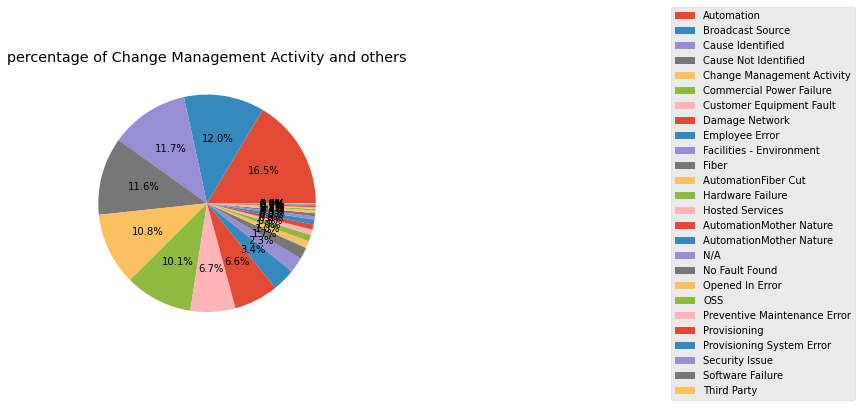

In [34]:
plt.rcParams['figure.figsize']=(25,5)
#explode = (.2, 0)
#plt.pie(df['RootCause'].value_counts(), explode = explode, autopct='%1.1f%%')
plt.pie(df['RootCause'].value_counts(), explode = None, autopct='%1.1f%%')
plt.title('percentage of Change Management Activity and others')
plt.legend(['Automation','Broadcast Source','Cause Identified','Cause Not Identified','Change Management Activity'
           ,'Commercial Power Failure','Customer Equipment Fault','Damage Network','Employee Error','Facilities - Environment',
           'Fiber','AutomationFiber Cut','Hardware Failure','Hosted Services','AutomationMother Nature','AutomationMother Nature',
            'N/A','No Fault Found','Opened In Error','OSS','Preventive Maintenance Error','Provisioning','Provisioning System Error',
            'Security Issue','Software Failure','Third Party'
           ],loc=6,borderaxespad=60)


plt.show( )

In [35]:
columns_to_show = ["Resolution", "RuleName", "SubmitterDepartment"]

df.groupby(["RootCause"])[columns_to_show].describe(percentiles=[])

Resolution         \
                                  count unique   
RootCause                                        
Application Fault                   135      2   
Automation                        15974      2   
Broadcast Source                    736      8   
Cause Identified                  11607      1   
Cause Not Identified               6402      1   
Change Management Activity        10450      8   
Client Software                       2      2   
Coax Cable                          236      3   
Commercial Power Failure           3304      9   
Coverage                              1      1   
Customer Equipment Fault            730      5   
Damage Network                        6      3   
Employee Error                       32      6   
Facilities - Environment           2253     10   
Fiber                              1671      9   
Fiber Cut                           220      4   
Hardware Failure                   6498     14   
Hosted Services                       2      2   
Low RF                               30      3   
Mother Nature                       772      7   
No Fault Found                    11239      3   
OSS                                 224      1   
Opened In Error                     443      1   
Preventive Maintenance Error        385      7   
Provisioning                        965      5   
Provisioning System Error            59      1   
Security Issue                      459      3   
Software Failure                  11371     12   
Switch Maintenance                   60      1   
Third Party                        1016      8   
Unknown                            9790      3   
User Access                           1      1   
Vandalism                            27      3   

                                                                    RuleName  \
                                                         top   freq    count   
RootCause                                                                      
Application Fault             Restart Services / Application    117      135   
Automation                        Network/Service Validation  15963    15974   
Broadcast Source                 Network / Service Validated    414      736   
Cause Identified                           See Linked ticket  11607    11607   
Cause Not Identified             Network / Service Validated   6402     6402   
Change Management Activity                 See Linked ticket   6554    10450   
Client Software                       Training / Walkthrough      1        2   
Coax Cable                                          Repaired    226      236   
Commercial Power Failure                      Hydro Restored   2999     3304   
Coverage                                        Reconfigured      1        1   
Customer Equipment Fault         Network / Service Validated    696      730   
Damage Network                                      Replaced      3        6   
Employee Error                                     Reconnect      9       32   
Facilities - Environment         Network / Service Validated   1125     2253   
Fiber                            Network / Service Validated   1103     1671   
Fiber Cut                                  See Linked ticket    106      220   
Hardware Failure                                    Repaired   1563     6498   
Hosted Services                                 Reconfigured      1        2   
Low RF                                              Repaired     15       30   
Mother Nature                    Network / Service Validated    515      772   
No Fault Found                   Network / Service Validated  11234    11239   
OSS                                                 Referred    224      224   
Opened In Error                                    Cancelled    443      443   
Preventive Maintenance Error                    Reconfigured    269      385   
Provisioning                                    Reconfigured    619 

In [36]:
!pip install Jinja2


In [37]:
pip install Jinja2

In [38]:
! python -m pip install --upgrade pip
! pip install pandas

In [39]:
print('no. of Automation')
df[df['RootCause']=='Automation'][['Bot', 'RuleName']].groupby(['Bot']).agg('count').sort_values('RuleName', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Automation


,RuleName
Bot,
DIAGNOSTIC-CASA-UPS-SWITCH-OVER,8042
DIAGNOSTIC_TWAMP,2352
DIAGNOSTIC-ARBOR-ALARM,1074
DIAGNOSTIC IPRAN LINK DOWN MAJOR ALARMS,677
RESOLUTION-ERICSSON-LTE-SERVICE-DEGRADED,676
DIAGNOSTIC-TLAN-RECTIFIER,633
DIAGNOSTIC-IPRAN-BGP-Peer-Connection-Idle,525
DIAGNOSTIC-IPRAN-SYNTH-LINK-DOWN-CORRELATED-ALARMS,524
DIAGNOSTIC-TLAN-TEMPERATURE,410


In [40]:
print('no. of Automation')
df[df['RootCause']=='Automation'][['WorkflowState', 'AutomationStatus']].groupby(['WorkflowState']).agg('count').sort_values('AutomationStatus', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Automation


,AutomationStatus
WorkflowState,
Closed by Auto Diag,15963
Closed by Auto Res/Val,11


In [41]:
print('no. of Automation')
df[df['RootCause']=='Automation'][['Status', 'Resolution']].groupby(['Status']).agg('count').sort_values('Resolution', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Automation


,Resolution
Status,
Closed,15974


In [42]:
print('no. of Broadcast Source')
df[df['RootCause']=='Broadcast Source'][['Bot', 'RuleName']].groupby(['Bot']).agg('count').sort_values('RuleName', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Broadcast Source


,RuleName
Bot,
Unknown,731
DIAGNOSTIC_XRE_ERROR,2
DIAGNOSTIC-ERICSSON-LTE-SERVICE-DEGRADED-SECTOR,1
DIAGNOSTIC-IPRAN-MPLSLDP-Session-Down,1
DIAGNOSTIC-RCBIN-LINK-DOWN,1


In [43]:
print('no. of Cause Identified')
df[df['RootCause']=='Cause Identified'][['Bot', 'RuleName']].groupby(['Bot']).agg('count').sort_values('RuleName', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Cause Identified


,RuleName
Bot,
Unknown,6377
DIAGNOSTIC-RCBIN-LINK-DOWN,1140
DIAGNOSTIC_GENERIC_WITH_CELL_STATUS,865
DIAGNOSTIC-ERICSSON-LTE-SERVICE-DEGRADED-SECTOR,572
DIAGNOSTIC-TLAN-INTEGRATED,335
DIAGNOSTIC-IPRAN-SYNTH-LINK-DOWN-CORRELATED-ALARMS,322
RESOLUTION-NODEB-SERVICE-DEGRADED,126
DIAGNOSTIC LTE PLMN SERVICE UNAVAILABLE,119
DIAGNOSTIC-TLAN-NNMI-RTU-HEARTBEAT,115


In [44]:
print('no. of Cause Not Identified')
df[df['RootCause']=='Cause Not Identified'][['Bot', 'RuleName']].groupby(['Bot']).agg('count').sort_values('RuleName', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Cause Not Identified


,RuleName
Bot,
Unknown,3568
DIAGNOSTIC-TLAN-INTEGRATED,276
DIAGNOSTIC-RCBIN-LINK-DOWN,274
DIAGNOSTIC-IPRAN-SYNTH-LINK-DOWN-CORRELATED-ALARMS,268
DIAGNOSTIC_GENERIC_WITH_CELL_STATUS,204
DIAGNOSTIC-TLAN-RECTIFIER,156
DIAGNOSTIC-REN-CORE-LINK-DOWN-MAJOR,130
RESOLUTION-ERICSSON-LTE-SERVICE-DEGRADED,120
DIAGNOSTIC-NNMI-BLACK-NODE-DOWN,84


In [45]:
print('no. of Change Management Activity')
df[df['RootCause']=='Change Management Activity'][['Bot', 'RuleName']].groupby(['Bot']).agg('count').sort_values('RuleName', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Change Management Activity


,RuleName
Bot,
Unknown,5193
DIAGNOSTIC-RCBIN-LINK-DOWN,1323
DIAGNOSTIC_GENERIC_WITH_CELL_STATUS,710
DIAGNOSTIC-IPRAN-SYNTH-LINK-DOWN-CORRELATED-ALARMS,396
DIAGNOSTIC-TLAN-INTEGRATED,277
DIAGNOSTIC-CASA-GENERIC-LINK-STATUS,250
DIAGNOSTIC_GENERIC_WITH_NO_CELL_STATUS,201
DIAGNOSTIC-SBC-REDUNDANCY-ALARMS,148
DIAGNOSTIC-ERICSSON-LTE-SERVICE-DEGRADED-SECTOR,136


In [46]:
print('no. of Commercial Power Failure')
df[df['RootCause']=='Commercial Power Failure'][['Bot', 'RuleName']].groupby(['Bot']).agg('count').sort_values('RuleName', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Commercial Power Failure


,RuleName
Bot,
DIAGNOSTIC-TLAN-SITE-COMMERCIAL-POWER-FAILURE,1743
Unknown,887
DIAGNOSTIC-TLAN-INTEGRATED,164
DIAGNOSTIC-TLAN-GENERATOR-RUN,140
DIAGNOSTIC-TLAN-RECTIFIER,62
DIAGNOSTIC-EON-7360-PON-OLT-LOS,58
DIAGNOSTIC-GENERIC-MICROWAVE-MINILINK,33
DIAGNOSTIC_GENERIC_WITH_NO_CELL_STATUS,24
DIAGNOSTIC_LTE_CELLKPI_DOWNTIME_MANUAL,22


In [47]:
#Let's check the supplier code for the unknown suppliers
df[df['Bot']=='Unknown']['Bot'].value_counts()

Unknown    41204
Name: Bot, dtype: int64

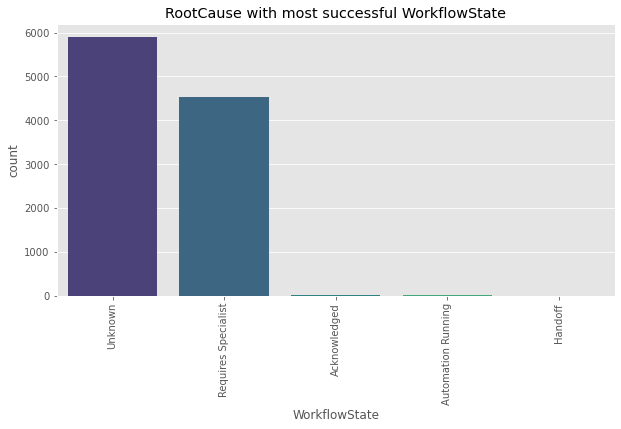

In [48]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(df[df['RootCause']=='Change Management Activity']['WorkflowState'],
             order=df[df['RootCause']=='Change Management Activity']['WorkflowState'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('RootCause with most successful WorkflowState')
plt.show()

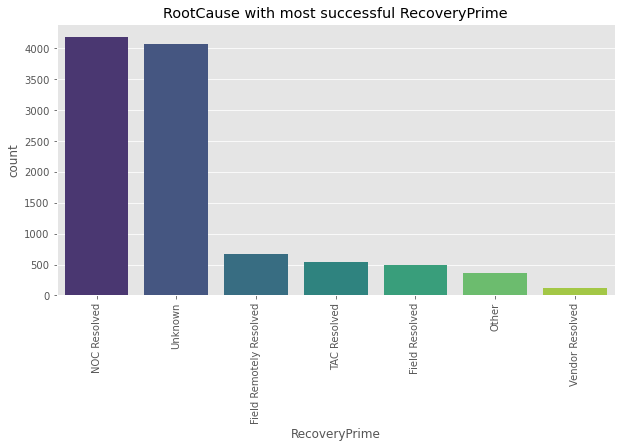

In [49]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(df[df['RootCause']=='Change Management Activity']['RecoveryPrime'],
             order=df[df['RootCause']=='Change Management Activity']['RecoveryPrime'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('RootCause with most successful RecoveryPrime')
plt.show()

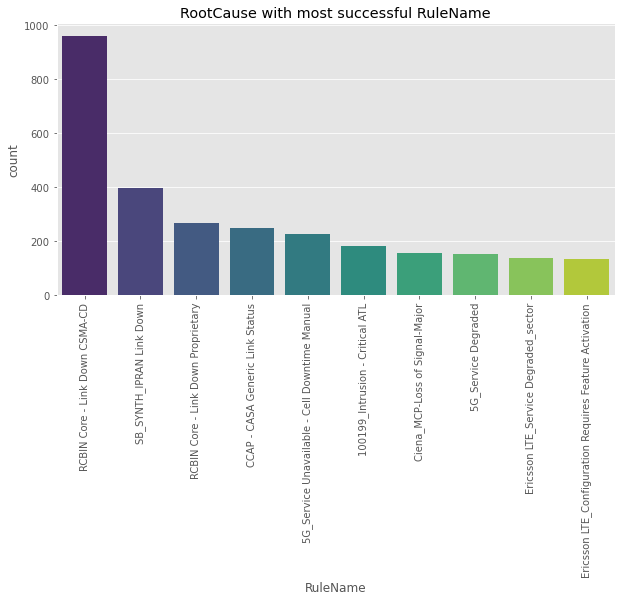

In [50]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(df[df['RootCause']=='Change Management Activity']['RuleName'],
             order=df[df['RootCause']=='Change Management Activity']['RuleName'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('RootCause with most successful RuleName')
plt.show()

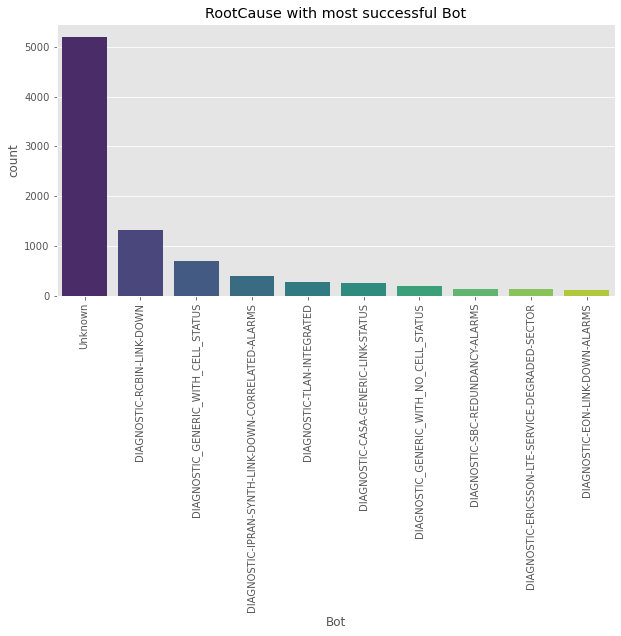

In [51]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(df[df['RootCause']=='Change Management Activity']['Bot'],
             order=df[df['RootCause']=='Change Management Activity']['Bot'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('RootCause with most successful Bot')
plt.show()

In [52]:
#let's filter usefull data alone
df=df[['ImtId',
       'CreateDate',
       'RuleName',
       'RootCause',
       'Resolution', 
       'RecoveryPrime',
       'WorkflowState',
       'Responsibility',
       'ResponsibilityDepartment', 
       'State',
       'Status', 
       'Submitter', 
       'SubmitterDepartment',
       'Bot',
       'AutomationSuiteName',
       'AutomationStatus',
       'AutomationFramework']]

In [53]:
#let's make a copy of filtered data
df_copy=df.copy()

In [54]:
# Defining all the conditions inside a function
def condition(x):
    if x == 'Automation':
        return 0
    elif x == 'Broadcast Source':
        return 1
    elif x == 'Cause Identified':
        return 2
    elif x == 'Cause Not Identified':
        return 3
    elif x == 'Change Management Activity':
        return 4
    else:
        return 5
 
# Applying the conditions
df['RootCause_NUM'] = df['RootCause'].apply(condition)
 
print(df['RootCause_NUM'])

0        3
1        5
2        5
3        1
4        5
        ..
96996    5
96997    5
96998    5
96999    5
97000    5
Name: RootCause_NUM, Length: 97100, dtype: int64


In [55]:
df.RootCause_NUM

0        3
1        5
2        5
3        1
4        5
        ..
96996    5
96997    5
96998    5
96999    5
97000    5
Name: RootCause_NUM, Length: 97100, dtype: int64

In [56]:
df['ImtId_NUM']=df['ImtId'].astype("category").cat.codes
df['CreateDate_NUM']=df['CreateDate'].astype("category").cat.codes
df['RuleName_NUM']=df['RuleName'].astype("category").cat.codes
#df['RootCause_NUM']=df['RootCause'].astype("category").cat.codes
df['Resolution_NUM']=df['Resolution'].astype("category").cat.codes
df['RecoveryPrime_NUM']=df['RecoveryPrime'].astype("category").cat.codes
df['WorkflowState_NUM']=df['WorkflowState'].astype("category").cat.codes
#df['EventSource_NUM']=df['EventSource'].astype("category").cat.codes
df['Responsibility_NUM']=df['Responsibility'].astype("category").cat.codes
df['ResponsibilityDepartment_NUM']=df['ResponsibilityDepartment'].astype("category").cat.codes
df['State_NUM']=df['State'].astype("category").cat.codes
df['Status_NUM']=df['Status'].astype("category").cat.codes   
df['Submitter_NUM']=df['Submitter'].astype("category").cat.codes 
df['SubmitterDepartment_NUM']=df['SubmitterDepartment'].astype("category").cat.codes 
df['Bot_NUM']=df['Bot'].astype("category").cat.codes 
df['AutomationSuiteName_NUM']=df['AutomationSuiteName'].astype("category").cat.codes 
#df['TeamName_NUM']=df['TeamName'].astype("category").cat.codes 
#df['AutomationType_NUM']=df['AutomationType'].astype("category").cat.codes
df['AutomationStatus_NUM']=df['AutomationStatus'].astype("category").cat.codes 
df['AutomationFramework_NUM']=df['AutomationFramework'].astype("category").cat.codes 


In [57]:
corr = df.corr()
corr

,RootCause_NUM,ImtId_NUM,CreateDate_NUM,RuleName_NUM,Resolution_NUM,RecoveryPrime_NUM,WorkflowState_NUM,Responsibility_NUM,ResponsibilityDepartment_NUM,State_NUM,Status_NUM,Submitter_NUM,SubmitterDepartment_NUM,Bot_NUM,AutomationSuiteName_NUM,AutomationStatus_NUM,AutomationFramework_NUM
RootCause_NUM,1.000000,0.145059,0.153457,0.267481,0.055952,0.403556,0.707450,-0.137575,0.179831,0.146732,0.179551,0.129506,0.125702,0.364930,0.350530,-0.279904,0.250695
ImtId_NUM,0.145059,1.000000,0.991515,0.087740,0.185341,0.220965,0.163208,0.012717,0.052157,0.203671,0.245216,0.041158,0.024598,0.130407,0.132113,-0.108773,0.103379
CreateDate_NUM,0.153457,0.991515,1.000000,0.094568,0.188272,0.227098,0.171892,0.011254,0.053214,0.204114,0.245807,0.042247,0.026102,0.136629,0.137924,-0.110252,0.104870
RuleName_NUM,0.267481,0.087740,0.094568,1.000000,0.013625,0.161184,0.263138,-0.025933,-0.008142,0.004242,0.007064,-0.025975,-0.004539,0.239083,0.442443,-0.096747,0.110070
Resolution_NUM,0.055952,0.185341,0.188272,0.013625,1.000000,0.522960,0.238332,-0.037734,0.143875,0.389780,0.483252,0.064897,0.054678,0.122193,0.075789,-0.090377,0.090038
RecoveryPrime_NUM,0.403556,0.220965,0.227098,0.161184,0.522960,1.000000,0.644183,0.067809,0.011887,0.243709,0.302204,-0.072655,-0.069529,0.363333,0.358685,-0.378213,0.363527
WorkflowState_NUM,0.707450,0.163208,0.171892,0.263138,0.238332,0.644183,1.000000,-0.066287,0.115699,0.074044,0.092239,0.056269,0.050775,0.555533,0.550833,-0.579633,0.558807
Responsibility_NUM,-0.137575,0.012717,0.011254,-0.025933,-0.037734,0.067809,-0.066287,1.000000,-0.033372,0.020892,0.014623,-0.299068,-0.188218,0.109456,0.098477,-0.070859,0.062591
ResponsibilityDepartment_NUM,0.179831,0.052157,0.053214,-0.008142,0.143875,0.011887,0.115699,-0.033372,1.000000,0.202189,0.229883,0.196552,0.283132,0.105948,0.003096,-0.014485,-0.004430
State_NUM,0.146732,0.203671,0.204114,0.004242,0.389780,0.243709,0.074044,0.020892,0.202189,1.000000,0.905703,0.092205,0.074859,0.074607,0.043400,-0.054227,0.045379


Text(0.5, 1.0, 'Correlation between variables')

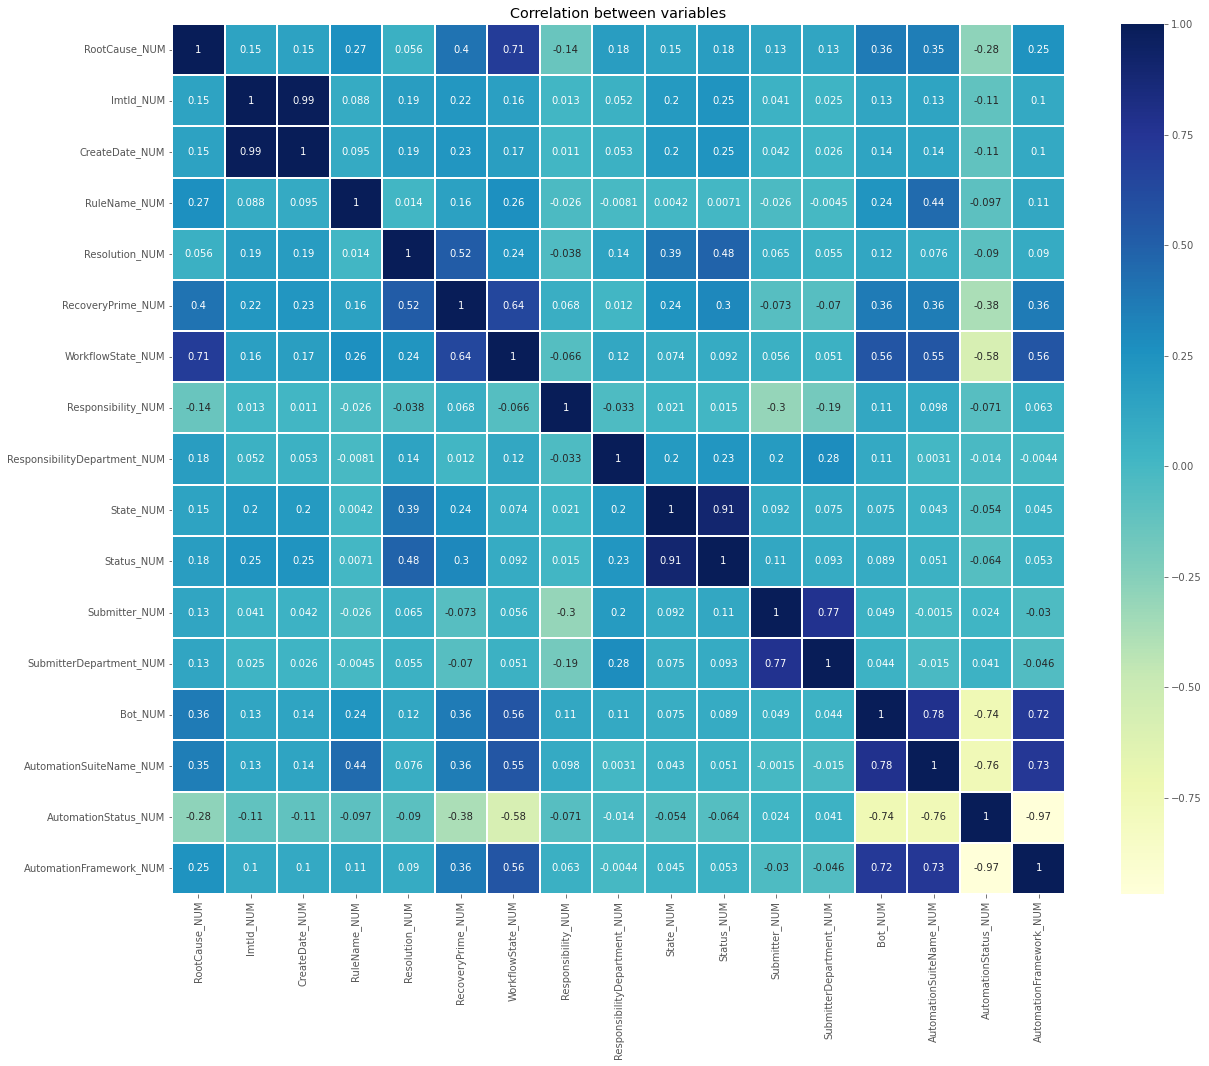

In [58]:
plt.figure(figsize=(20,16))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=0.2, cmap="YlGnBu",annot=True)
plt.title("Correlation between variables")

In [59]:
corr["RootCause_NUM"].sort_values(ascending=False)

RootCause_NUM                   1.000000
WorkflowState_NUM               0.707450
RecoveryPrime_NUM               0.403556
Bot_NUM                         0.364930
AutomationSuiteName_NUM         0.350530
RuleName_NUM                    0.267481
AutomationFramework_NUM         0.250695
ResponsibilityDepartment_NUM    0.179831
Status_NUM                      0.179551
CreateDate_NUM                  0.153457
State_NUM                       0.146732
ImtId_NUM                       0.145059
Submitter_NUM                   0.129506
SubmitterDepartment_NUM         0.125702
Resolution_NUM                  0.055952
Responsibility_NUM             -0.137575
AutomationStatus_NUM           -0.279904
Name: RootCause_NUM, dtype: float64

In [60]:
# Let's check whether having AutomationType's number making any impact on RootCause
df['Resolution_NUM'].values[df['Resolution_NUM'].values>0]=1
df['Resolution_NUM'].fillna(0, inplace=True)
df[df['Resolution_NUM']==0]['RootCause_NUM'].value_counts()

5    41
Name: RootCause_NUM, dtype: int64

In [61]:
# Let's check whether having Bot_NUM's number making any impact on RootCause
df['Bot_NUM'].values[df['Bot_NUM'].values>0]=1
df['Bot_NUM'].fillna(0, inplace=True)
df[df['Bot_NUM']==0]['RootCause_NUM'].value_counts()

0    677
5    393
2    115
4     85
3     66
Name: RootCause_NUM, dtype: int64

In [62]:
# Let's check whether having Bot_NUM's number making any impact on RootCause
df['RuleName_NUM'].values[df['RuleName_NUM'].values>0]=1
df['RuleName_NUM'].fillna(0, inplace=True)
df[df['RuleName_NUM']==0]['RootCause_NUM'].value_counts()

4    182
5     94
3     18
2      6
Name: RootCause_NUM, dtype: int64

In [63]:
print(df.columns)

Index(['ImtId', 'CreateDate', 'RuleName', 'RootCause', 'Resolution',
       'RecoveryPrime', 'WorkflowState', 'Responsibility',
       'ResponsibilityDepartment', 'State', 'Status', 'Submitter',
       'SubmitterDepartment', 'Bot', 'AutomationSuiteName', 'AutomationStatus',
       'AutomationFramework', 'RootCause_NUM', 'ImtId_NUM', 'CreateDate_NUM',
       'RuleName_NUM', 'Resolution_NUM', 'RecoveryPrime_NUM',
       'WorkflowState_NUM', 'Responsibility_NUM',
       'ResponsibilityDepartment_NUM', 'State_NUM', 'Status_NUM',
       'Submitter_NUM', 'SubmitterDepartment_NUM', 'Bot_NUM',
       'AutomationSuiteName_NUM', 'AutomationStatus_NUM',
       'AutomationFramework_NUM'],
      dtype='object')


In [64]:
cols = ['RootCause','ImtId','CreateDate','RuleName','Resolution','RecoveryPrime','WorkflowState',
        'Responsibility','ResponsibilityDepartment','State','Status','Submitter','SubmitterDepartment',
        'Bot','AutomationSuiteName','AutomationStatus','AutomationFramework']


#Splitting dataset into labels and features
X = df.drop(columns = cols)
y = df.RootCause_NUM


In [65]:
#Splitting dataset into labels and features
X = df.drop(columns = ['RootCause_NUM','RootCause','ImtId','CreateDate','RuleName','Resolution','RecoveryPrime','WorkflowState',
        'Responsibility','ResponsibilityDepartment','State','Status','Submitter','SubmitterDepartment',
        'Bot','AutomationSuiteName','AutomationStatus','AutomationFramework'])
y = df.RootCause_NUM

In [66]:
X.head()

,ImtId_NUM,CreateDate_NUM,RuleName_NUM,Resolution_NUM,RecoveryPrime_NUM,WorkflowState_NUM,Responsibility_NUM,ResponsibilityDepartment_NUM,State_NUM,Status_NUM,Submitter_NUM,SubmitterDepartment_NUM,Bot_NUM,AutomationSuiteName_NUM,AutomationStatus_NUM,AutomationFramework_NUM
0,0,0,1,1,2,6,22,9,1,0,5,3,1,98,0,1
1,1,1,1,1,3,6,15,17,1,0,0,0,1,98,0,1
2,2,2,1,1,2,6,21,44,1,0,0,0,1,98,0,1
3,3,3,1,1,3,6,15,18,1,0,0,0,1,98,0,1
4,4,4,1,1,3,5,15,19,1,0,0,0,1,12,1,0


In [67]:
y.head()

0    3
1    5
2    5
3    1
4    5
Name: RootCause_NUM, dtype: int64



## '''''''''''''''''''''''''''''''''''''''''''''''' Data Exploration Analyasis Step TWO"'''''''''''''''''''''''''''''''''''''''''''''''''

In [68]:
# DATA PREPROCESSING - Scaling Data

#standardizing all the columns
sc=StandardScaler()
scaled=sc.fit_transform(X)

#converted to dataframe to work easily on columns
X_scaled=pd.DataFrame(scaled, columns=X.columns)
#print(data)

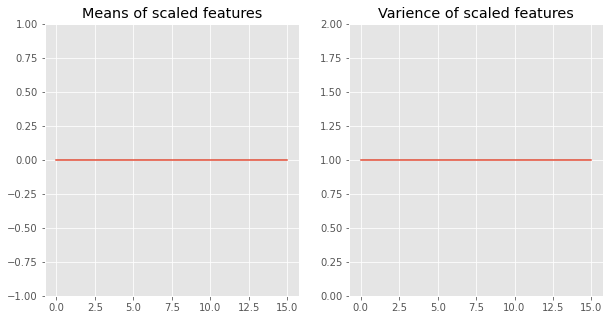

In [69]:
#check weathear data is standardized or not
plt.subplot(121)
plt.ylim(-1,1)

means=[]
for i in range(X_scaled.shape[1]):
    means.append(np.mean(X_scaled.iloc[:,i]))
plt.plot(means, scaley=False)
plt.title('Means of scaled features')

plt.subplot(122)
plt.ylim(0,2)
vars=[]
for i in range(X_scaled.shape[1]):
    vars.append(np.var(X_scaled.iloc[:,i]))
plt.plot(vars, scaley=False)
plt.title('Varience of scaled features')
plt.show()

========================================================================================================================

# --------------------------------   PART TWO MODEL BUILDING   -------------------------------

========================================================================================================================

*******************************************************************************************************************************
###############################################################################################################################

# ''''''''''''''''''''''...Data Handling - Predictive / Supervised Learning...''''''''''''''''''''

###############################################################################################################################
*******************************************************************************************************************************

## 1. Root Cause Analysis by Implementing Mechine Learning Algorithms

###############################################################################################################################

In [70]:
#scaling data is necessary for making gradient descent faster 
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
y = pd.Series(y)

In [71]:
#For cross-validation using train-test split ( TEST-SIZE = 30% )
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [72]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("y_train shape {}, len {}.".format(y_train.shape,len(y_train)))
print("y_test shape {}, len {}.".format(y_test.shape,len(y_test)))

X_train shape (72825, 16), len 72825.
X_test shape (24275, 16), len 24275.
y_train shape (72825,), len 72825.
y_test shape (24275,), len 24275.


### 2.1. MACRO FOR CALCULATING FOR CALCULATING  Precision, Recall and F1

In [73]:
#CREATE MACRO
results_df = pd.DataFrame()
columns = ["Model", "Cross Val Score", "pre_macro", "recall_macro", "f1_macro", "f1_macro_manual"]

def evaluate(true, predicted):
    pre_macro = metrics.precision_score(true, predicted, average="macro")
    recall_macro = metrics.recall_score(true, predicted, average="macro")
    f1_macro = metrics.f1_score(true, predicted, average="macro")
    f1_score_raw = metrics.f1_score(true, predicted, average=None)
    f1_macro_manual = f1_score_raw.mean()
    return pre_macro, recall_macro, f1_macro, f1_macro_manual

def append_results(model_name, model, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred), cross_val_score(model, X, y,cv=5).mean()]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

### 2.2.1. KNN Model

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
score_knn = accuracy_score(y_test,pred_knn)

In [76]:
print('confusion_matrix KNN      :\n', metrics.confusion_matrix(y_test, pred_knn))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report KNN :\n',metrics.classification_report(y_test, pred_knn))

confusion_matrix KNN      :
 [[ 4018     0     0     0     0     2]
 [    0    85     0     4     1    95]
 [    0     1  2533     8   213   172]
 [    0     7     9   637    98   853]
 [    0     3   259   117  1591   628]
 [    1    64   179   466   424 11807]]
---------------------------------------------------------------------------------------------------------------------

classification_report KNN :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.53      0.46      0.49       185
           2       0.85      0.87      0.86      2927
           3       0.52      0.40      0.45      1604
           4       0.68      0.61      0.65      2598
           5       0.87      0.91      0.89     12941

    accuracy                           0.85     24275
   macro avg       0.74      0.71      0.72     24275
weighted avg       0.84      0.85      0.85     24275



### 2.2.2. Logestic Regression Model

In [77]:
# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred_log = log_reg.predict(X_test)
score_log = accuracy_score(y_test,pred_log)

In [78]:
print('confusion_matrix LogisticRegression      :\n', metrics.confusion_matrix(y_test, pred_log))
print('------------------------------------------------------------------------------------------------------------------\n')
print('classification_report LogisticRegression :\n',metrics.classification_report(y_test, pred_log))

confusion_matrix LogisticRegression      :
 [[ 4020     0     0     0     0     0]
 [    0    42     2     0     0   141]
 [    0     0  2750     0     5   172]
 [    0     3     1     0     5  1595]
 [    0     0   993     0    58  1547]
 [    5    29  1118     0    89 11700]]
------------------------------------------------------------------------------------------------------------------

classification_report LogisticRegression :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.57      0.23      0.32       185
           2       0.57      0.94      0.71      2927
           3       0.00      0.00      0.00      1604
           4       0.37      0.02      0.04      2598
           5       0.77      0.90      0.83     12941

    accuracy                           0.76     24275
   macro avg       0.55      0.52      0.48     24275
weighted avg       0.69      0.76      0.70     24275



In [79]:
log_reg2 = LogisticRegression(solver='saga', # you can  add max_iter=500,tol=0.001,
                           class_weight={False:1, True:9})
log_reg2.fit(X_train, y_train)
pred_log2 = log_reg.predict(X_test)
score_log2 = accuracy_score(y_test,pred_log2)

In [80]:
print('confusion_matrix LogisticRegression      :\n', metrics.confusion_matrix(y_test, pred_log2))
print('------------------------------------------------------------------------------------------------------------------\n')
print('classification_report LogisticRegression :\n',metrics.classification_report(y_test, pred_log2))

confusion_matrix LogisticRegression      :
 [[ 4020     0     0     0     0     0]
 [    0    42     2     0     0   141]
 [    0     0  2750     0     5   172]
 [    0     3     1     0     5  1595]
 [    0     0   993     0    58  1547]
 [    5    29  1118     0    89 11700]]
------------------------------------------------------------------------------------------------------------------

classification_report LogisticRegression :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.57      0.23      0.32       185
           2       0.57      0.94      0.71      2927
           3       0.00      0.00      0.00      1604
           4       0.37      0.02      0.04      2598
           5       0.77      0.90      0.83     12941

    accuracy                           0.76     24275
   macro avg       0.55      0.52      0.48     24275
weighted avg       0.69      0.76      0.70     24275



### 2.2.3. SVC Model

In [81]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
score_svc = accuracy_score(y_test,pred_svc)

In [82]:
print('confusion_matrix SVC      :\n', metrics.confusion_matrix(y_test, pred_svc))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report SVC :\n',metrics.classification_report(y_test, pred_svc))

confusion_matrix SVC      :
 [[ 4018     0     0     0     0     2]
 [    0    19     7     0     0   159]
 [    0     1  2556     0     3   367]
 [    0     3     4     0    15  1582]
 [    0     0  1012     0   116  1470]
 [    1     8   320     0    63 12549]]
-----------------------------------------------------------------------------------------------------------------

classification_report SVC :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.61      0.10      0.18       185
           2       0.66      0.87      0.75      2927
           3       0.00      0.00      0.00      1604
           4       0.59      0.04      0.08      2598
           5       0.78      0.97      0.86     12941

    accuracy                           0.79     24275
   macro avg       0.61      0.50      0.48     24275
weighted avg       0.73      0.79      0.73     24275



### 2.2.4. Random Forest Model

In [83]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
score_rfc = accuracy_score(y_test,pred_rfc)

In [84]:
print('confusion_matrix RandomForest      :\n', metrics.confusion_matrix(y_test, pred_rfc))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report RandomForest :\n',metrics.classification_report(y_test, pred_rfc))

confusion_matrix RandomForest      :
 [[ 4020     0     0     0     0     0]
 [    0   116     0     6     0    63]
 [    0     0  2653    10   133   131]
 [    0     5    11   782    91   715]
 [    0     1   170    78  1844   505]
 [    0    63   152   534   395 11797]]
-----------------------------------------------------------------------------------------------------------------

classification_report RandomForest :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.63      0.63      0.63       185
           2       0.89      0.91      0.90      2927
           3       0.55      0.49      0.52      1604
           4       0.75      0.71      0.73      2598
           5       0.89      0.91      0.90     12941

    accuracy                           0.87     24275
   macro avg       0.79      0.77      0.78     24275
weighted avg       0.87      0.87      0.87     24275



### 2.2.5. Ada Boost Model

In [85]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
adab.fit(X_train,y_train)
pred_adab = adab.predict(X_test)
score_adab = accuracy_score(y_test,pred_adab)

In [86]:
print('confusion_matrix AdaBoost      :\n', metrics.confusion_matrix(y_test, pred_adab))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report AdaBoost :\n',metrics.classification_report(y_test, pred_adab))

confusion_matrix AdaBoost      :
 [[ 4020     0     0     0     0     0]
 [    0   130     0     0     0    55]
 [    0     2  1083     0     0  1842]
 [    0    20     0     0     0  1584]
 [    0    10   388     0     0  2200]
 [    0   854   159     0     0 11928]]
-----------------------------------------------------------------------------------------------------------------

classification_report AdaBoost :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.13      0.70      0.22       185
           2       0.66      0.37      0.48      2927
           3       0.00      0.00      0.00      1604
           4       0.00      0.00      0.00      2598
           5       0.68      0.92      0.78     12941

    accuracy                           0.71     24275
   macro avg       0.41      0.50      0.41     24275
weighted avg       0.61      0.71      0.64     24275



### 2.2.6. Ridge Classification Model 

In [87]:
from sklearn.linear_model import RidgeClassifier

In [88]:
ridge_reg = RidgeClassifier()
ridge_reg.fit(X_train, y_train)
pred_ridge = ridge_reg.predict(X_test)

In [89]:
print('confusion_matrix Ridge Classification      :\n', metrics.confusion_matrix(y_test, pred_ridge))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report Ridge Classification :\n',metrics.classification_report(y_test, pred_ridge))

confusion_matrix Ridge Classification      :
 [[ 4020     0     0     0     0     0]
 [    2     0     1     0     0   182]
 [    7     0  1056     0     3  1861]
 [    8     0    13     0     4  1579]
 [    4     0   505     0    34  2055]
 [  213     0   297     0    24 12407]]
---------------------------------------------------------------------------------------------------------------------

classification_report Ridge Classification :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4020
           1       0.00      0.00      0.00       185
           2       0.56      0.36      0.44      2927
           3       0.00      0.00      0.00      1604
           4       0.52      0.01      0.03      2598
           5       0.69      0.96      0.80     12941

    accuracy                           0.72     24275
   macro avg       0.45      0.39      0.37     24275
weighted avg       0.65      0.72      0.64     24275



### 2.2.7. Decision Tree Regressor Model

In [90]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred_dtree = dtree.predict(X_test)

In [91]:
print('confusion_matrix Decision Tree Classifier      :\n', metrics.confusion_matrix(y_test, pred_dtree))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report Decision Tree Classifier :\n',metrics.classification_report(y_test, pred_dtree))

confusion_matrix Decision Tree Classifier      :
 [[ 4020     0     0     0     0     0]
 [    0   111     0     8     0    66]
 [    0     0  2619    14   157   137]
 [    0     4    12   817    96   675]
 [    0     1   156    90  1868   483]
 [    0    62   169   694   587 11429]]
---------------------------------------------------------------------------------------------------------------------

classification_report Decision Tree Classifier :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.62      0.60      0.61       185
           2       0.89      0.89      0.89      2927
           3       0.50      0.51      0.51      1604
           4       0.69      0.72      0.70      2598
           5       0.89      0.88      0.89     12941

    accuracy                           0.86     24275
   macro avg       0.77      0.77      0.77     24275
weighted avg       0.86      0.86      0.86     24275



### 2.2.8. Gradient Boosting Classifier Model (GBM)

In [92]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
pred_gbm = gbm.predict(X_test)

In [93]:
print('confusion_matrix Gradient Boosting Classifier      :\n', metrics.confusion_matrix(y_test, pred_gbm))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report Gradient Boosting Classifier :\n',metrics.classification_report(y_test, pred_gbm))

confusion_matrix Gradient Boosting Classifier      :
 [[ 4020     0     0     0     0     0]
 [    0    74     0     0     0   111]
 [    0     0  2532     0    38   357]
 [    0     4     0   103    11  1486]
 [    0     0   815     0   305  1478]
 [    0    40   152    11    65 12673]]
---------------------------------------------------------------------------------------------------------------------

classification_report Gradient Boosting Classifier :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.63      0.40      0.49       185
           2       0.72      0.87      0.79      2927
           3       0.90      0.06      0.12      1604
           4       0.73      0.12      0.20      2598
           5       0.79      0.98      0.87     12941

    accuracy                           0.81     24275
   macro avg       0.79      0.57      0.58     24275
weighted avg       0.81      0.81      0.76     24

### 2.2.9. XGBoost Classifier Model

In [94]:
xg_reg = xgb.XGBClassifier()

### 2.2.10. LassoCV Classifier Model

lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

## 2.3. Regularization and Optimization all Models

###############################################################################################################################

### 2.3.1. KNN Opt

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
list_knn=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_s = knn.predict(X_test)
    scores = accuracy_score(y_test,pred_s)
    list_knn.append(scores)

In [96]:
print(max(list_knn))

0.861503604531411


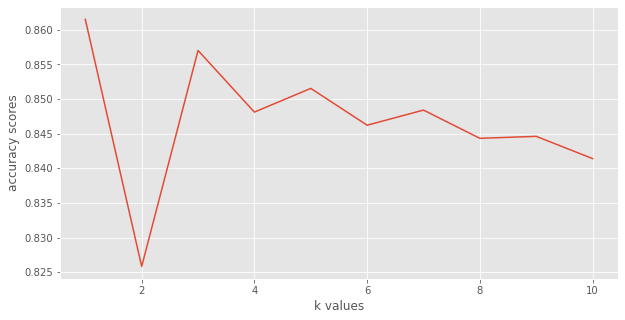

In [97]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),list_knn)
plt.xlabel('k values')
plt.ylabel('accuracy scores')
plt.show()

In [98]:
#KNN TUNING:

#Initiating Random Forest regressor
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#Define the grid of hyperparameters
params_grid = {'n_neighbors': [2,3,5,10],
               'weights': ['uniform']
              }

#Initiate Grid search
grid_model = GridSearchCV(estimator = knn_model, param_grid = params_grid , cv = 5)
                       
#Fitting the grid search
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 10], 'weights': ['uniform']})

In [99]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_knn_g = grid_model.best_estimator_.predict(X_test)
print(pred_knn_g[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'n_neighbors': 3, 'weights': 'uniform'}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.850010298661174
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[4 5 2 0 4 5 5 5 2 5]
57468    5
85248    5
23590    2
32375    0
48302    4
57131    5
74090    5
66611    5
51501    2
52349    5
Name: RootCause_NUM, dtype: int64


In [100]:
print('confusion_matrix KNN_opt     :\n', metrics.confusion_matrix(y_test, pred_knn_g))
print('------------------------------------------------------------------------------------------------------------------\n')
print('classification_report KNN_opt :\n',metrics.classification_report(y_test, pred_knn_g))

confusion_matrix KNN_opt     :
 [[ 4018     0     0     0     0     2]
 [    0   100     0     3     1    81]
 [    0     1  2593     9   183   141]
 [    0     9    12   728    91   764]
 [    0     3   234   133  1678   550]
 [    0    75   203   614   362 11687]]
------------------------------------------------------------------------------------------------------------------

classification_report KNN_opt :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.53      0.54      0.54       185
           2       0.85      0.89      0.87      2927
           3       0.49      0.45      0.47      1604
           4       0.72      0.65      0.68      2598
           5       0.88      0.90      0.89     12941

    accuracy                           0.86     24275
   macro avg       0.75      0.74      0.74     24275
weighted avg       0.85      0.86      0.85     24275



### 2.3.2. Logistic Regression Optimization

In [101]:
from sklearn.linear_model import SGDClassifier
lclassifier = SGDClassifier(loss='log_loss',learning_rate='optimal', eta0=0.01, penalty='l2')

In [102]:
#compare that k-fold scores
print("linear regression's 10-fold score:",cross_val_score(lclassifier, X, y, cv=5).mean())

linear regression's 10-fold score: nan


In [103]:
#Gradient descent can used in different models that have a loss function
'''We are defining a param_grid here to try out different configuration 
(non-exhaustive) which gives us an idea of what values/range of values 
will give a better model to test/deploy 
'''
params = {
            'loss': ['hinge'],#'hinge'
            'penalty':['l2'],
            'alpha': [0.1],
            'l1_ratio':[1],
            'learning_rate':['optimal'],
            'eta0':[0.001],
            'power_t':[0.01]
         }
grid_model2 = GridSearchCV(SGDClassifier(random_state=0), params, cv=5)
grid_model2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=0),
             param_grid={'alpha': [0.1], 'eta0': [0.001], 'l1_ratio': [1],
                         'learning_rate': ['optimal'], 'loss': ['hinge'],
                         'penalty': ['l2'], 'power_t': [0.01]})

In [104]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model2.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model2.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_log_g = grid_model2.best_estimator_.predict(X_test)
print(pred_log_g[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'alpha': 0.1, 'eta0': 0.001, 'l1_ratio': 1, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2', 'power_t': 0.01}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.6923034672159286
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[5 5 5 0 5 5 5 5 5 5]
57468    5
85248    5
23590    2
32375    0
48302    4
57131    5
74090    5
66611    5
51501    2
52349    5
Name: RootCause_NUM, dtype: int64


In [105]:
print('confusion_matrix LogesticRegression_opt      :\n', metrics.confusion_matrix(y_test, pred_log_g))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report LogesticRegression_opt :\n',metrics.classification_report(y_test, pred_log_g))

confusion_matrix LogesticRegression_opt      :
 [[ 4020     0     0     0     0     0]
 [    2     0     0     0     0   183]
 [    7     0     0     0     3  2917]
 [    8     0     0     0     4  1592]
 [    4     0     0     0    34  2560]
 [  213     0     0     0    25 12703]]
---------------------------------------------------------------------------------------------------------------------

classification_report LogesticRegression_opt :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4020
           1       0.00      0.00      0.00       185
           2       0.00      0.00      0.00      2927
           3       0.00      0.00      0.00      1604
           4       0.52      0.01      0.03      2598
           5       0.64      0.98      0.77     12941

    accuracy                           0.69     24275
   macro avg       0.35      0.33      0.29     24275
weighted avg       0.55      0.69      0.58     24275



### 2.3.3. SVC opt

In [106]:
svc = SGDClassifier(loss='hinge', learning_rate='constant',eta0=0.5)

In [107]:
print("svc's 5-fold score:",cross_val_score(svc,X,y,cv=5).mean())

svc's 5-fold score: 0.6881668383110194


In [108]:
'''We are defining a param_grid here to try out different configuration 
(non-exhaustive) which gives us an idea of what values/range of values 
will give a better model to test/deploy 
'''
params = {
            'loss': ['hinge'],
            'alpha': [0.001,0.01,0.1,1],
            'l1_ratio':[0,0.5,1],
            'learning_rate':['constant'],
            'eta0':[0.001,0.01,0.1,1],
            'power_t':[0.5,1,2]
         }
grid_model3 = GridSearchCV(SGDClassifier(penalty='elasticnet',random_state=0),
                          params,cv=5)
grid_model3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=SGDClassifier(penalty='elasticnet', random_state=0),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'eta0': [0.001, 0.01, 0.1, 1], 'l1_ratio': [0, 0.5, 1],
                         'learning_rate': ['constant'], 'loss': ['hinge'],
                         'power_t': [0.5, 1, 2]})

In [109]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model3.best_params_)
print('------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model3.best_score_)
print('------------------------------------------------------------------------------------------------------------------\n')
print('------------------------------------------------------------------------------------------------------------------\n')
pred_svc_g = grid_model3.best_estimator_.predict(X_test)
print(pred_svc_g[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 1, 'learning_rate': 'constant', 'loss': 'hinge', 'power_t': 0.5}
------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.7501682114658428
------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

[5 4 2 0 5 5 5 5 2 5]
57468    5
85248    5
23590    2
32375    0
48302    4
57131    5
74090    5
66611    5
51501    2
52349    5
Name: RootCause_NUM, dtype: int64


In [110]:
print('confusion_matrix SVC_opt      :\n', metrics.confusion_matrix(y_test, pred_svc_g))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report SVC_opt :\n',metrics.classification_report(y_test, pred_svc_g))

confusion_matrix SVC_opt      :
 [[ 4020     0     0     0     0     0]
 [    0     2     1     0     0   182]
 [    0     1  2246     6     4   670]
 [    0     3    14     5     4  1578]
 [    0     2   795     3    49  1749]
 [   11   114   837    94    54 11831]]
-----------------------------------------------------------------------------------------------------------------

classification_report SVC_opt :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.02      0.01      0.01       185
           2       0.58      0.77      0.66      2927
           3       0.05      0.00      0.01      1604
           4       0.44      0.02      0.04      2598
           5       0.74      0.91      0.82     12941

    accuracy                           0.75     24275
   macro avg       0.47      0.45      0.42     24275
weighted avg       0.68      0.75      0.68     24275



### 2.3.4. RandomForest Model

In [111]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,201,10):
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i,random_state=42),
                                 X,y,cv=5).mean())

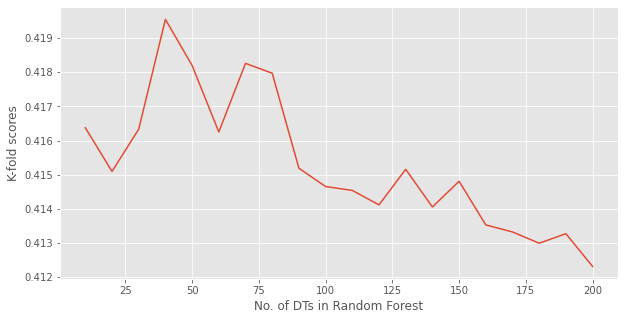

In [112]:
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of DTs in Random Forest')
plt.ylabel('K-fold scores')
plt.show()

In [113]:

#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params = {
            'n_estimators': [100,115,120],
            'max_depth': [12,13,14]
        }
grid_model4 = GridSearchCV(RandomForestClassifier(random_state=0), params,cv=5)
grid_model4.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [12, 13, 14],
                         'n_estimators': [100, 115, 120]})

In [114]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model4.best_params_)
print('-----------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model4.best_score_)
print('-----------------------------------------------------------------------------------------------------------------\n')
print('-----------------------------------------------------------------------------------------------------------------\n')
pred_rfo = grid_model4.best_estimator_.predict(X_test)
print(pred_rfo[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'max_depth': 12, 'n_estimators': 100}
-----------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.4587229660144181
-----------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------

[5 5 2 0 4 5 5 5 2 5]
57468    5
85248    5
23590    2
32375    0
48302    4
57131    5
74090    5
66611    5
51501    2
52349    5
Name: RootCause_NUM, dtype: int64


In [115]:
print('confusion_matrix RandomForest_opt      :\n', metrics.confusion_matrix(y_test, pred_rfo))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report RandomForest_opt :\n',metrics.classification_report(y_test, pred_rfo))

confusion_matrix RandomForest_opt      :
 [[ 4020     0     0     0     0     0]
 [    0    64     0     0     0   121]
 [    0     0  2579     0     3   345]
 [    0     2     0   128     0  1474]
 [    0     0   931     0   240  1427]
 [    0     6   175     2     8 12750]]
-----------------------------------------------------------------------------------------------------------------

classification_report RandomForest_opt :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.89      0.35      0.50       185
           2       0.70      0.88      0.78      2927
           3       0.98      0.08      0.15      1604
           4       0.96      0.09      0.17      2598
           5       0.79      0.99      0.88     12941

    accuracy                           0.81     24275
   macro avg       0.89      0.56      0.58     24275
weighted avg       0.85      0.81      0.76     24275



### 2.3.5. Adaboost Model

In [116]:
#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(1,201,10):
    scores.append(cross_val_score(AdaBoostClassifier(n_estimators=i,random_state=0),
                                  X,y,cv=5).mean())

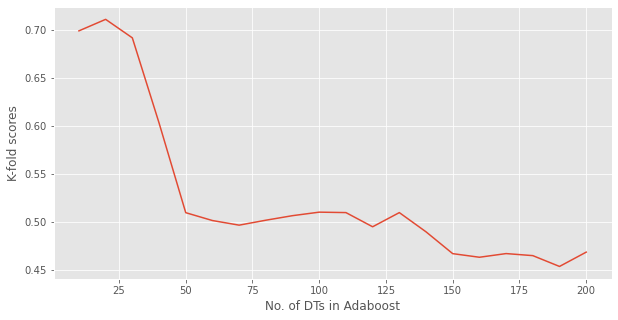

In [117]:
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

In [118]:
#including other params like max_depth, we will apply gridsearch to fine the best settings 
from sklearn.tree import DecisionTreeClassifier
params = {
            'n_estimators': [0.1,1,5,10],
            'base_estimator': [DecisionTreeClassifier(max_depth=13,random_state=0),
                               DecisionTreeClassifier(max_depth=14,random_state=0),
                               DecisionTreeClassifier(max_depth=16,random_state=0)]
        }
grid_model5 = GridSearchCV(AdaBoostClassifier(random_state=0), params,cv=5)
grid_model5.fit(X,y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=13,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=14,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=16,
                                                                   random_state=0)],
                         'n_estimators': [0.1, 1, 5, 10]})

In [119]:
from sklearn import *

In [120]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model5.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model5.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_adab_o = grid_model5.best_estimator_.predict(X_test)
print(pred_adab_o[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'base_estimator': DecisionTreeClassifier(max_depth=14, random_state=0), 'n_estimators': 10}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.44130792996910395
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[5 5 2 0 4 5 5 5 2 5]
57468    5
85248    5
23590    2
32375    0
48302    4
57131    5
74090    5
66611    5
51501    2
52349    5
Name: RootCause_NUM, dtype: int64


In [121]:
print('confusion_matrix  AdaBoost_opt      :\n', metrics.confusion_matrix(y_test, pred_adab_o))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report AdaBoost_opt :\n',metrics.classification_report(y_test, pred_adab_o))

confusion_matrix  AdaBoost_opt      :
 [[ 4020     0     0     0     0     0]
 [    0   172     0     0     0    13]
 [    0     0  2589     1   194   143]
 [    0     0     0  1225    43   336]
 [    0     0    89    49  2182   278]
 [    0     6    49   325   282 12279]]
---------------------------------------------------------------------------------------------------------------------

classification_report AdaBoost_opt :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.97      0.93      0.95       185
           2       0.95      0.88      0.92      2927
           3       0.77      0.76      0.76      1604
           4       0.81      0.84      0.82      2598
           5       0.94      0.95      0.94     12941

    accuracy                           0.93     24275
   macro avg       0.91      0.89      0.90     24275
weighted avg       0.93      0.93      0.93     24275



### 2.3.6. Decision Tree Classifier Model Opt

In [122]:
#Graph k-fold score vs no. of estimators in Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
scores = []
for i in range(1,201,10):
    dtree = DecisionTreeClassifier(max_depth=i,random_state=0)
    scores.append(cross_val_score(dtree, X,y,cv=5).mean())

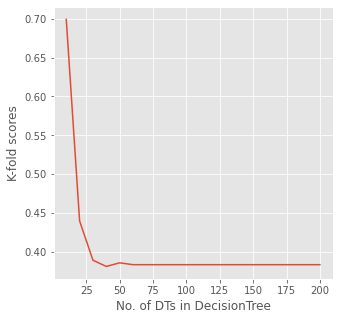

In [123]:
plt.figure(figsize=(5,5))
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of DTs in DecisionTree')
plt.ylabel('K-fold scores')
plt.show()

In [124]:
#Decision Tree TUNING:

#Initiating Random Forest regressor
dtree_model = DecisionTreeClassifier(random_state=0)

#Define the grid of hyperparameters
params_grid = {
              'max_depth': [1,3,10],
              'min_samples_split': [0.01,1,2],
              'min_samples_leaf': [0.05,1,2],
              'max_features': [3,5,15]
              
              }

#Initiate Grid search
grid_model6 = GridSearchCV( estimator =dtree_model,
                       param_grid = params_grid ,
                       cv = 5,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

#Fitting the grid search
grid_model6.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10], 'max_features': [3, 5, 15],
                         'min_samples_leaf': [0.05, 1, 2],
                         'min_samples_split': [0.01, 1, 2]},
             scoring='neg_mean_squared_error', verbose=1)

In [125]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model6.best_params_)
print('-----------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model6.best_score_)
print('-----------------------------------------------------------------------------------------------------------------\n')
print('-----------------------------------------------------------------------------------------------------------------\n')
pred_clfm = grid_model6.best_estimator_.predict(X_test)
print(pred_rfo[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
-----------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : -0.7545485753518709
-----------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------

[5 5 2 0 4 5 5 5 2 5]
57468    5
85248    5
23590    2
32375    0
48302    4
57131    5
74090    5
66611    5
51501    2
52349    5
Name: RootCause_NUM, dtype: int64


In [126]:
print('confusion_matrix RandomForest_opt      :\n', metrics.confusion_matrix(y_test, pred_clfm))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report RandomForest_opt :\n',metrics.classification_report(y_test, pred_clfm))

confusion_matrix RandomForest_opt      :
 [[ 4020     0     0     0     0     0]
 [    0    99     0     0     0    86]
 [    0     0  2616     0     2   309]
 [    0    12     0   126    19  1447]
 [    0     3   987     9   200  1399]
 [    0    74   207    30    62 12568]]
-----------------------------------------------------------------------------------------------------------------

classification_report RandomForest_opt :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.53      0.54      0.53       185
           2       0.69      0.89      0.78      2927
           3       0.76      0.08      0.14      1604
           4       0.71      0.08      0.14      2598
           5       0.79      0.97      0.87     12941

    accuracy                           0.81     24275
   macro avg       0.75      0.59      0.58     24275
weighted avg       0.80      0.81      0.75     24275



In [127]:
#Graph k-fold score vs no. of estimators in Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
scores = []
for i in range(1,201,10):
    clfm = RandomForestClassifier(max_depth=i,random_state=0)
    scores.append(cross_val_score(clfm, X,y,cv=5).mean())

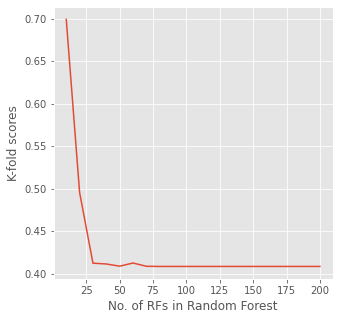

In [128]:
plt.figure(figsize=(5,5))
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of RFs in Random Forest')
plt.ylabel('K-fold scores')
plt.show()

In [129]:
#Random Forest Multiclass TUNING:

#Initiating Random Forest regressor
clfm_model = RandomForestClassifier(random_state=0)

#Define the grid of hyperparameters
params_grid = {
              'max_depth':[None], #[3,5,10],
              'min_samples_split': [0.01,0.1,1,2,5],
              'min_samples_leaf': [0.05,1,2,5],
              'max_features': [None]
              
              }

#Initiate Grid search
grid_model10 = GridSearchCV( estimator =clfm_model,
                       param_grid = params_grid ,
                       cv = 5,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

#Fitting the grid search
grid_model10.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [None],
                         'min_samples_leaf': [0.05, 1, 2, 5],
                         'min_samples_split': [0.01, 0.1, 1, 2, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [130]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model10.best_params_)
print('-----------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model10.best_score_)
print('-----------------------------------------------------------------------------------------------------------------\n')
print('-----------------------------------------------------------------------------------------------------------------\n')
pred_clfm = grid_model10.best_estimator_.predict(X_test)
print(pred_rfo[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
-----------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : -0.4944455887401304
-----------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------

[5 5 2 0 4 5 5 5 2 5]
57468    5
85248    5
23590    2
32375    0
48302    4
57131    5
74090    5
66611    5
51501    2
52349    5
Name: RootCause_NUM, dtype: int64


In [131]:
print('confusion_matrix RandomForest_opt      :\n', metrics.confusion_matrix(y_test, pred_clfm))
print('-----------------------------------------------------------------------------------------------------------------\n')
print('classification_report RandomForest_opt :\n',metrics.classification_report(y_test, pred_clfm))

confusion_matrix RandomForest_opt      :
 [[ 4020     0     0     0     0     0]
 [    0    95     0     4     0    86]
 [    0     0  2634    10   138   145]
 [    0     4     9   692    81   818]
 [    0     1   188    69  1742   598]
 [    0    38   132   356   281 12134]]
-----------------------------------------------------------------------------------------------------------------

classification_report RandomForest_opt :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4020
           1       0.69      0.51      0.59       185
           2       0.89      0.90      0.89      2927
           3       0.61      0.43      0.51      1604
           4       0.78      0.67      0.72      2598
           5       0.88      0.94      0.91     12941

    accuracy                           0.88     24275
   macro avg       0.81      0.74      0.77     24275
weighted avg       0.87      0.88      0.87     24275



In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)



RandomForestClassifier(max_depth=2, random_state=0)

In [133]:

print(clf.predict([[0, 0, 0, 0]]))

[1]


In [134]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [135]:
clf.score(X_test, y_test)

0.69870236869207

In [136]:
y_pred_clf=clf.predict(X_test)
y_pred_clf

array([5, 5, 5, ..., 5, 5, 0], dtype=int64)

## -----------------------------------------------------  CONLUSION  -------------------------------------------------------



## A. Visualization the Result

###############################################################################################################################

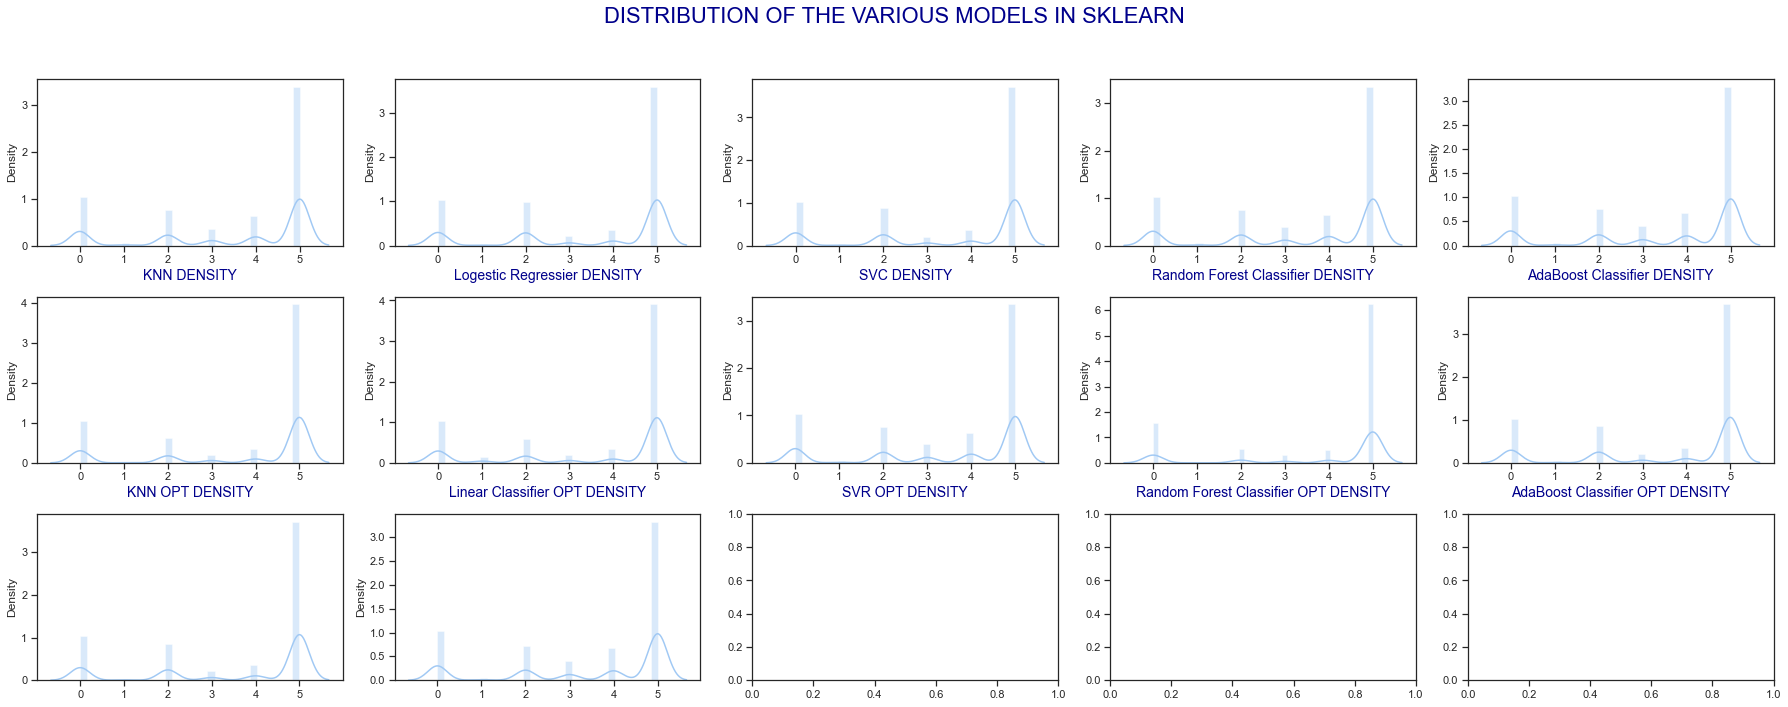

In [137]:
#Density-Plot and Box-Plot
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(nrows =3, ncols = 5, figsize = (25, 10))

sns.distplot((y_test,pred_knn), ax = ax[0,0])
ax[0,0].set_xlabel("KNN DENSITY", color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_log), ax = ax[0,1])
ax[0,1].set_xlabel('Logestic Regressier DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_svc), ax = ax[0,2])
ax[0,2].set_xlabel('SVC DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_rfc), ax = ax[0,3])
ax[0,3].set_xlabel('Random Forest Classifier DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_dtree), ax = ax[0,4])
ax[1,3].set_xlabel('Decision Tree Classifier DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_ridge), ax = ax[1,0])
ax[1,4].set_xlabel('Ridge Classifier DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_adab), ax = ax[1,1])
ax[0,4].set_xlabel('AdaBoost Classifier DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_knn_g), ax = ax[1,2])
ax[1,0].set_xlabel('KNN OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_log_g), ax = ax[1,3])
ax[1,1].set_xlabel('Linear Classifier OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_svc_g), ax = ax[1,4])
ax[1,2].set_xlabel('SVR OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_rfo), ax = ax[2,0])
ax[1,3].set_xlabel('Random Forest Classifier OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_adab_o), ax = ax[2,1])
ax[1,4].set_xlabel('AdaBoost Classifier OPT DENSITY', color = "darkblue", fontsize = 14)

#sns.distplot((y_test,pred_dtree_sgd), ax = ax[2,2])
#ax[1,3].set_xlabel('Decision Tree Classifier OPT DENSITY', color = "darkblue", fontsize = 14)

#sns.distplot((y_test,pred_ridge_sgd), ax = ax[2,3])
#ax[1,4].set_xlabel('Ridge Classifier OPT DENSITY', color = "darkblue", fontsize = 14)

fig.suptitle('DISTRIBUTION OF THE VARIOUS MODELS IN SKLEARN', color = "darkblue", fontsize = 22)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

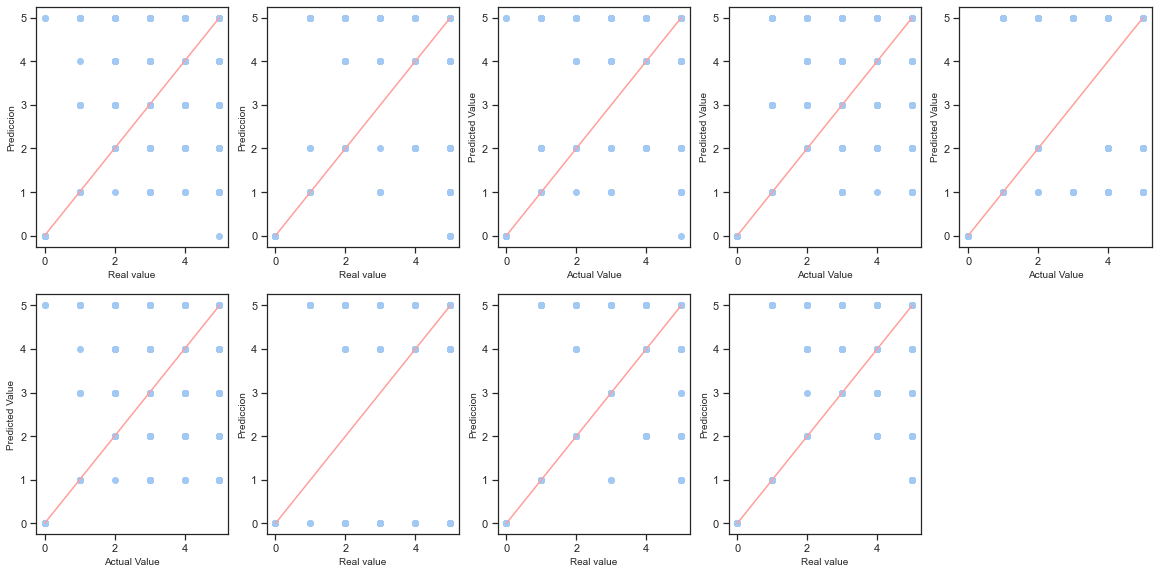

In [138]:
# PLOTTING THE PREDICTIONS
plt.rcParams['figure.figsize']= 20,15


plt.subplot(3,5,1)
plt.scatter(y_test,pred_knn)
plt.plot(y_test, y_test, 'r')
fig.suptitle('KNN', fontsize=20)
plt.xlabel('Real value', fontsize = 10)  
plt.ylabel('Prediccion', fontsize = 10) 

plt.subplot(3,5,2)
plt.scatter(y_test,pred_log)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 10)  
plt.ylabel('Prediccion', fontsize = 10) 

plt.subplot(3,5,3)
plt.scatter(y_test,pred_svc)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value', fontsize = 10)  
plt.ylabel('Predicted Value', fontsize = 10) 

plt.subplot(3,5,4)
plt.scatter(y_test,pred_rfc)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value', fontsize = 10)  
plt.ylabel('Predicted Value', fontsize = 10)  

plt.subplot(3,5,5)
plt.scatter(y_test,pred_adab)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value', fontsize = 10)  
plt.ylabel('Predicted Value', fontsize = 10) 

#plt.subplot(3,5,6)
#plt.scatter(y_test,pred_dtree)
#plt.plot(y_test, y_test, 'r')
#plt.xlabel('Actual Value')  
#plt.ylabel('Predicted Value')  

#plt.subplot(3,5,7)
#plt.scatter(y_test,pred_ridge)
#plt.plot(y_test, y_test, 'r')
#plt.xlabel('Actual Value')  
#plt.ylabel('Predicted Value') 

plt.subplot(3,5,6)
plt.scatter(y_test,pred_knn_g)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value', fontsize = 10)  
plt.ylabel('Predicted Value', fontsize = 10) 

plt.subplot(3,5,7)
plt.scatter(y_test,pred_log_g)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 10)  
plt.ylabel('Prediccion', fontsize = 10) 

#plt.subplot(3,5,10)
#plt.scatter(y_test,pred_svc_g)
#plt.plot(y_test, y_test, 'r')
#plt.xlabel('Real value', fontsize = 10)  
#plt.ylabel('Prediccion', fontsize = 10) 

plt.subplot(3,5,8)
plt.scatter(y_test,pred_rfo)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 10)  
plt.ylabel('Prediccion', fontsize = 10) 

plt.subplot(3,5,9)
plt.scatter(y_test,pred_adab_o)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 10)  
plt.ylabel('Prediccion', fontsize = 10) 

#plt.subplot(3,5,13)
#plt.scatter(y_test,pred_dtree_sgd)
#plt.plot(y_test, y_test, 'r')
#plt.xlabel('Real value', fontsize = 10)  
#plt.ylabel('Prediccion', fontsize = 10) 

#plt.subplot(3,5,14)
#plt.scatter(y_test,pred_ridge_sgd)
#plt.plot(y_test, y_test, 'r')
#plt.xlabel('Real value', fontsize = 10)  
#plt.ylabel('Prediccion', fontsize = 10) 

fig.suptitle('PREDICTIONS OF THE VARIOUS MODELS IN SKLEARN', color = "darkblue", fontsize = 8)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

## B. COMPARE ALL MODELS

In [139]:
print('Display Accuracy, Recall and Precision For Classification Models')
print('-----------------------------------------------------------------------------------------------------------------\n')
print('-------------------------------------------------------------------------------------------------------------------')
print('********************************...........INFERENCE AND CONCLUSION.............***********************************')
print('-------------------------------------------------------------------------------------------------------------------')
results_df = append_results("KNN", knn, results_df, y_test, pred_knn)
results_df = append_results("Logestic Regression", log_reg, results_df, y_test, pred_log)
#results_df = append_results("SVC", svc, results_df, y_test, pred_svc)
results_df = append_results("Random Forest", rfc, results_df, y_test, pred_rfc)
results_df = append_results("Ada Boost", adab, results_df, y_test, pred_adab)
results_df = append_results("KNN_opt", grid_model, results_df, y_test, pred_knn_g)
results_df = append_results("LogesticRegression_opt", grid_model2, results_df, y_test, pred_log_g)
#results_df = append_results("SVC_opt", grid_model3, results_df, y_test, pred_svc_g)
results_df = append_results("Random Forest_opt", grid_model4, results_df, y_test, pred_rfo)
results_df = append_results("Ada Boost_opt", grid_model5, results_df, y_test, pred_adab_o)
results_df

Display Accuracy, Recall and Precision For Classification Models
-----------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------
********************************...........INFERENCE AND CONCLUSION.............***********************************
-------------------------------------------------------------------------------------------------------------------


,Model,Cross Val Score,pre_macro,recall_macro,f1_macro,f1_macro_manual
0,KNN,0.742112,0.707708,0.722747,0.722747,0.939
1,Logestic Regression,0.545525,0.515497,0.484102,0.484102,0.942
2,Random Forest,0.785294,0.773720,0.779030,0.779030,0.943
3,Ada Boost,0.411625,0.499071,0.412114,0.412114,0.938
4,KNN_opt,0.747072,0.738130,0.742032,0.742032,0.940
5,LogesticRegression_opt,0.349454,0.332449,0.294926,0.294926,0.940
6,Random Forest_opt,0.886772,0.564079,0.578637,0.578637,0.948
7,Ada Boost_opt,0.905025,0.894448,0.899432,0.899432,0.933


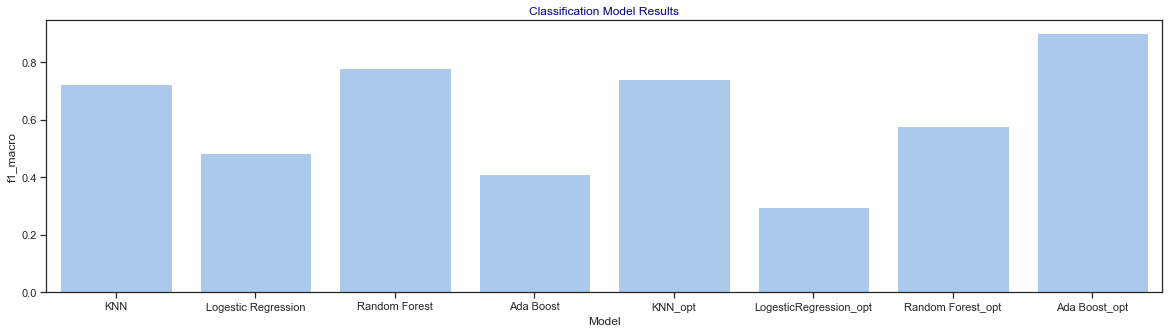

In [140]:
plt.rcParams['figure.figsize'] = 20,5
g = sns.barplot("Model","f1_macro", data = results_df, color = 'b')
g.set_title("Classification Model Results", color = "darkblue")
plt.show()

In [141]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier

Classifiers=[["Random Forest",RandomForestClassifier()],
             ["Support Vector Machine",SVC()],
             ["LogisticRegression",LogisticRegression()],
             ["KNN",KNeighborsClassifier(n_neighbors=5)],
             ["Naive Bayes",GaussianNB()],
             ["Decision Tree",DecisionTreeClassifier()],
             ["AdaBoostClassifier", AdaBoostClassifier()],
             ["GradientBoostingClassifier", GradientBoostingClassifier()],
             ["XGB", XGBClassifier()],
             ["CatBoost", CatBoostClassifier(logging_level='Silent')]  
]

pred_X = df.tail(100)

In [142]:
df_id = df['ImtId']
#df_id.shape

In [143]:
pred_X = X
#pred_X.shape

In [144]:
df_ImtId_M = df['ImtId']
df_CreateDate_M = df['CreateDate']
df_RuleName_M = df['RuleName'] 
df_RootCause_M = df['RootCause'] 
df_Resolution_M =df['Resolution'] 
df_RecoveryPrime_M = df['RecoveryPrime']
df_WorkflowState_M = df['WorkflowState'] 
df_Responsibility_M = df['Responsibility'] 
df_ResponsibilityDepartment_M = df['ResponsibilityDepartment'] 
df_State_M = df['State'] 
df_Status_M =df['Status'] 
df_Submitter_M = df['Submitter']
df_SubmitterDepartment_M = df['SubmitterDepartment']
df_Bot_M = df['Bot']
df_AutomationSuiteName_M = df['AutomationSuiteName']
df_AutomationStatus_M = df['AutomationStatus'] 
df_AutomationFramework_M = df['AutomationFramework']

df_id = df["ImtId"].tail(100)
df_id.shape

In [145]:
df_ImtId_M = df['ImtId']

In [146]:
pred_adab_o = pd.Series(pred_adab_o)

In [147]:
predDf = pd.DataFrame({'df_ImtId_M':df_id, 'df_RootCause_M':pred_adab_o})
predDf

,df_ImtId_M,df_RootCause_M
0,IMT.2112.043195,5.0
1,IMT.2112.043196,5.0
2,IMT.2112.043197,2.0
3,IMT.2112.043198,0.0
4,IMT.2112.043199,4.0
...,...,...
96996,IMT.2204.002571,NaN
96997,IMT.2204.002572,NaN
96998,IMT.2204.002574,NaN
96999,IMT.2204.002575,NaN


In [148]:
predDf = pd.DataFrame({'RuleName_NUM':df_RuleName_M, 'RootCause_NUM':pred_adab_o})
predDf

,RuleName_NUM,RootCause_NUM
0,UMTS UL RSSI -85dBm,5.0
1,BMC - IUM Evolution - Parameter Count changed ...,5.0
2,TLAN_HVAC_Failure,2.0
3,SB_SYNTH_IPTV - Medius - Critical,0.0
4,CCAP - CASA System Monitoring UPS Switch over,4.0
...,...,...
96996,MiniLinkTN_SNMP_Reserved Position,NaN
96997,SB_SYNTH_IPRAN Link Down,NaN
96998,SB_SYNTH_IPRAN Link Down,NaN
96999,Core Security - peakflowSPTraps CRITICAL,NaN


In [149]:
predDf = pd.DataFrame({'Resolution_NUM':df_Resolution_M, 'RootCause_NUM':pred_adab_o})
predDf

,Resolution_NUM,RootCause_NUM
0,Network / Service Validated,5.0
1,Network / Service Validated,5.0
2,Network / Service Validated,2.0
3,Source Restored,0.0
4,Re-Set,4.0
...,...,...
96996,Unknown,NaN
96997,Network / Service Validated,NaN
96998,Network / Service Validated,NaN
96999,Network / Service Validated,NaN


In [150]:
predDf = pd.DataFrame({'RecoveryPrime_NUM':df_RecoveryPrime_M, 'RootCause_NUM':pred_adab_o})
predDf

,RecoveryPrime_NUM,RootCause_NUM
0,Field Resolved,5.0
1,NOC Resolved,5.0
2,Field Resolved,2.0
3,NOC Resolved,0.0
4,NOC Resolved,4.0
...,...,...
96996,Unknown,NaN
96997,NOC Resolved,NaN
96998,NOC Resolved,NaN
96999,NOC Resolved,NaN


In [151]:
predDf = pd.DataFrame({'WorkflowState_NUM':df_WorkflowState_M, 'RootCause_NUM':pred_adab_o})
predDf

,WorkflowState_NUM,RootCause_NUM
0,Unknown,5.0
1,Unknown,5.0
2,Unknown,2.0
3,Unknown,0.0
4,Requires Specialist,4.0
...,...,...
96996,Unknown,NaN
96997,Requires Specialist,NaN
96998,Requires Specialist,NaN
96999,Requires Specialist,NaN


In [152]:
predDf = pd.DataFrame({'Responsibility_NUM':df_Responsibility_M, 'RootCause_NUM':pred_adab_o})
predDf

,Responsibility_NUM,RootCause_NUM
0,Ops Cable and Wireless Ontario,5.0
1,NOC,5.0
2,Ops Cable and Wireless GTA,2.0
3,NOC,0.0
4,NOC,4.0
...,...,...
96996,Ops Cable and Wireless Ontario,NaN
96997,NOC,NaN
96998,NOC,NaN
96999,NOC,NaN


In [153]:
predDf = pd.DataFrame({'Bot_NUM':df_Bot_M, 'RootCause_NUM':pred_adab_o})
predDf

,Bot_NUM,RootCause_NUM
0,Unknown,5.0
1,Unknown,5.0
2,Unknown,2.0
3,Unknown,0.0
4,DIAGNOSTIC-CASA-UPS-SWITCH-OVER,4.0
...,...,...
96996,Unknown,NaN
96997,DIAGNOSTIC-IPRAN-SYNTH-LINK-DOWN-CORRELATED-AL...,NaN
96998,DIAGNOSTIC-IPRAN-SYNTH-LINK-DOWN-CORRELATED-AL...,NaN
96999,DIAGNOSTIC-ARBOR-ALARM,NaN


In [154]:
predDf.value_counts()

Bot_NUM                                                      RootCause_NUM
Unknown                                                      5.0              4795
DIAGNOSTIC-CASA-UPS-SWITCH-OVER                              5.0              1993
Unknown                                                      0.0              1486
                                                             4.0               987
                                                             2.0               955
                                                                              ... 
DIAGNOSTIC_LTE_RESOURCE_ACTIVATION_TIMEOUT_SERVICE_DEGRADED  0.0                 1
DIAGNOSTIC_LTE_RESOURCE_ACTIVATION_TIMEOUT                   4.0                 1
DIAGNOSTIC-GQAM-RESET                                        3.0                 1
                                                             2.0                 1
DIAGNOSTIC-CASA-OSPF                                         5.0                 1
Length: 447,

In [155]:
predDf["RootCause_NUM"].value_counts(normalize=True)

5.0    0.537499
0.0    0.165586
2.0    0.112374
4.0    0.111307
3.0    0.065931
1.0    0.007303
Name: RootCause_NUM, dtype: float64

In [156]:
predDf.sort_values(by="RootCause_NUM", ascending=False).head()

,Bot_NUM,RootCause_NUM
0,Unknown,5.0
17627,Unknown,5.0
17626,Unknown,5.0
17625,Unknown,5.0
9227,DIAGNOSTIC-CASA-UPS-SWITCH-OVER,5.0


############################################################################################################################

![image.png](attachment:image.png)

############################################################################################################################

In [157]:
import pandas as pd
from scipy import stats

###### Creating a contingency table

###### Showing row percentages

In [158]:
df_Responsibility = df['Responsibility']

df.shape

(97100, 34)

In [159]:
predDf = pd.DataFrame({'Responsibility_NUM':df_Responsibility, 'RootCause_NUM':pred_adab_o})
predDf

,Responsibility_NUM,RootCause_NUM
0,Ops Cable and Wireless Ontario,5.0
1,NOC,5.0
2,Ops Cable and Wireless GTA,2.0
3,NOC,0.0
4,NOC,4.0
...,...,...
96996,Ops Cable and Wireless Ontario,NaN
96997,NOC,NaN
96998,NOC,NaN
96999,NOC,NaN


In [160]:
contab_freq = pd.crosstab(
    predDf['RootCause_NUM'],
    predDf['Responsibility_NUM'],
    margins = True
   )
contab_freq

Responsibility_NUM,AB MW Region,Access Network Engineering,Access Networks AB MW Region,Access Networks Atlantic,Access Networks BC Region,Access Networks National,Access Networks Quebec,Atlantic,BC Region,Cable and Wireless GTA,...,OSS,OSS Infrastructure and Systems,Operation Core Video,Ops Cable and Wireless GTA,Ops Cable and Wireless Ontario,Quebec,TAC,Wireless Access Planning,Wireline Access Network and Transport Ops,All
RootCause_NUM,,,,,,,,,,,,,,,,,,,,,
0.0,28,21,79,42,58,29,50,31,33,82,...,0,8,0,88,102,51,21,26,240,4036
1.0,2,2,4,0,3,2,0,0,1,5,...,0,1,0,5,4,1,0,0,18,178
2.0,25,24,55,22,40,12,31,23,17,62,...,0,9,2,68,62,26,14,11,149,2739
3.0,14,12,31,12,22,4,17,10,12,33,...,0,6,0,32,43,23,12,11,75,1607
4.0,34,23,62,26,44,7,37,22,26,54,...,2,2,0,63,66,24,18,14,157,2713
5.0,136,67,270,97,205,44,140,98,119,272,...,2,42,1,309,341,147,81,70,771,13101
All,239,149,501,199,372,98,275,184,208,508,...,4,68,3,565,618,272,146,132,1410,24374


In [161]:
conttab_relfreq = pd.crosstab(
    predDf['RootCause_NUM'],
    predDf['Responsibility_NUM'],
    margins = True,
    normalize='index'
   )
conttab_relfreq

Responsibility_NUM,AB MW Region,Access Network Engineering,Access Networks AB MW Region,Access Networks Atlantic,Access Networks BC Region,Access Networks National,Access Networks Quebec,Atlantic,BC Region,Cable and Wireless GTA,...,Network Transportation and Operations,OSS,OSS Infrastructure and Systems,Operation Core Video,Ops Cable and Wireless GTA,Ops Cable and Wireless Ontario,Quebec,TAC,Wireless Access Planning,Wireline Access Network and Transport Ops
RootCause_NUM,,,,,,,,,,,,,,,,,,,,,
0.0,0.006938,0.005203,0.019574,0.010406,0.014371,0.007185,0.012389,0.007681,0.008176,0.020317,...,0.010902,0.000000,0.001982,0.000000,0.021804,0.025273,0.012636,0.005203,0.006442,0.059465
1.0,0.011236,0.011236,0.022472,0.000000,0.016854,0.011236,0.000000,0.000000,0.005618,0.028090,...,0.005618,0.000000,0.005618,0.000000,0.028090,0.022472,0.005618,0.000000,0.000000,0.101124
2.0,0.009127,0.008762,0.020080,0.008032,0.014604,0.004381,0.011318,0.008397,0.006207,0.022636,...,0.009858,0.000000,0.003286,0.000730,0.024827,0.022636,0.009493,0.005111,0.004016,0.054399
3.0,0.008712,0.007467,0.019291,0.007467,0.013690,0.002489,0.010579,0.006223,0.007467,0.020535,...,0.010579,0.000000,0.003734,0.000000,0.019913,0.026758,0.014312,0.007467,0.006845,0.046671
4.0,0.012532,0.008478,0.022853,0.009583,0.016218,0.002580,0.013638,0.008109,0.009583,0.019904,...,0.008109,0.000737,0.000737,0.000000,0.023222,0.024327,0.008846,0.006635,0.005160,0.057870
5.0,0.010381,0.005114,0.020609,0.007404,0.015648,0.003359,0.010686,0.007480,0.009083,0.020762,...,0.010839,0.000153,0.003206,0.000076,0.023586,0.026029,0.011221,0.006183,0.005343,0.058850
All,0.009806,0.006113,0.020555,0.008164,0.015262,0.004021,0.011283,0.007549,0.008534,0.020842,...,0.010380,0.000164,0.002790,0.000123,0.023180,0.025355,0.011159,0.005990,0.005416,0.057849


###### Chi-squared test of independence

In [162]:
predDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97100 entries, 0 to 97000
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Responsibility_NUM  97100 non-null  object 
 1   RootCause_NUM       24374 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [163]:
pd.crosstab([df['RootCause'], df['Bot']], df['Responsibility'])

Responsibility                                                    AB MW Region  \
RootCause         Bot                                                            
Application Fault DIAGNOSTIC-ERICSSON-UMTS-DIGITAL-CABLE-FAILURE             0   
                  DIAGNOSTIC-MW-Ceragon                                      0   
                  DIAGNOSTIC-MW-MiniLink-Service-Degraded                    0   
                  DIAGNOSTIC-TLAN-INTEGRATED                                 0   
                  DIAGNOSTIC-UMTS-MGW-ALARMS                                 0   
...                                                                        ...   
Vandalism         DIAGNOSTIC_GENERIC_WITH_CELL_STATUS                        0   
                  DIAGNOSTIC_GENERIC_WITH_NO_CELL_STATUS                     0   
                  RESOLUTION-ERICSSON-LTE-SERVICE-DEGRADED                   0   
                  RESOLUTION-NODEB-SERVICE-DEGRADED                          0   
                  Unknown                                                    0   

Responsibility                                                    Access Network Engineering  \
RootCause         Bot                                                                          
Application Fault DIAGNOSTIC-ERICSSON-UMTS-DIGITAL-CABLE-FAILURE                           0   
                  DIAGNOSTIC-MW-Ceragon                                                    0   
                  DIAGNOSTIC-MW-MiniLink-Service-Degraded                                  0   
                  DIAGNOSTIC-TLAN-INTEGRATED                                               0   
                  DIAGNOSTIC-UMTS-MGW-ALARMS                                               0   
...                                                                                      ...   
Vandalism         DIAGNOSTIC_GENERIC_WITH_CELL_STATUS                                      0   
                  DIAGNOSTIC_GENERIC_WITH_NO_CELL_STATUS                                   0   
                  RESOLUTION-ERICSSON-LTE-SERVICE-DEGRADED                                 0   
                  RESOLUTION-NODEB-SERVICE-DEGRADED                                        0   
                  Unknown                                                                  0   

Responsibility                                                    Access Networks AB MW Region  \
RootCause         Bot                                                                            
Application Fault DIAGNOSTIC-ERICSSON-UMTS-DIGITAL-CABLE-FAILURE                             0   
                  DIAGNOSTIC-MW-Ceragon                                                      0   
                  DIAGNOSTIC-MW-MiniLink-Service-Degraded                                    1   
                  DIAGNOSTIC-TLAN-INTEGRATED                                                 0   
                  DIAGNOSTIC-UMTS-MGW-ALARMS                                                 0   
...                                                                                        ...   
Vandalism         DIAGNOSTIC_GENERIC_WITH_CELL_STATUS                                        0   
                  DIAGNOSTIC_GENERIC_WITH_NO_CELL_STATUS                                     0   
                  RESOLUTION-ERICSSON-LTE-SERVICE-DEGRADED                                   0   
                  RESOLUTION-NODEB-SERVICE-DEGRADED                                          0   
                  Unknown                                                                    0   

Responsibility                                                    Access Networks Atlantic  \
RootCause         Bot                                                                        
Application Fault DIAGNOSTIC-ERICSSON-UMTS-DIGITAL-CABLE-FAILURE                         0   
                  DIAGNOSTIC-MW-Ceragon                                                  0   
                  DIAGNOSTIC-MW-M

In [164]:
predDf

,Responsibility_NUM,RootCause_NUM
0,Ops Cable and Wireless Ontario,5.0
1,NOC,5.0
2,Ops Cable and Wireless GTA,2.0
3,NOC,0.0
4,NOC,4.0
...,...,...
96996,Ops Cable and Wireless Ontario,NaN
96997,NOC,NaN
96998,NOC,NaN
96999,NOC,NaN


In [165]:
print('no. of Change Management Activity')
df[df['RootCause']=='Change Management Activity'][['Bot', 'RuleName']].groupby(['Bot']).agg('count').sort_values('RuleName', 
                         ascending=False).head(10).style.background_gradient(cmap='Wistia')

no. of Change Management Activity


,RuleName
Bot,
Unknown,5193
DIAGNOSTIC-RCBIN-LINK-DOWN,1323
DIAGNOSTIC_GENERIC_WITH_CELL_STATUS,710
DIAGNOSTIC-IPRAN-SYNTH-LINK-DOWN-CORRELATED-ALARMS,396
DIAGNOSTIC-TLAN-INTEGRATED,277
DIAGNOSTIC-CASA-GENERIC-LINK-STATUS,250
DIAGNOSTIC_GENERIC_WITH_NO_CELL_STATUS,201
DIAGNOSTIC-SBC-REDUNDANCY-ALARMS,148
DIAGNOSTIC-ERICSSON-LTE-SERVICE-DEGRADED-SECTOR,136


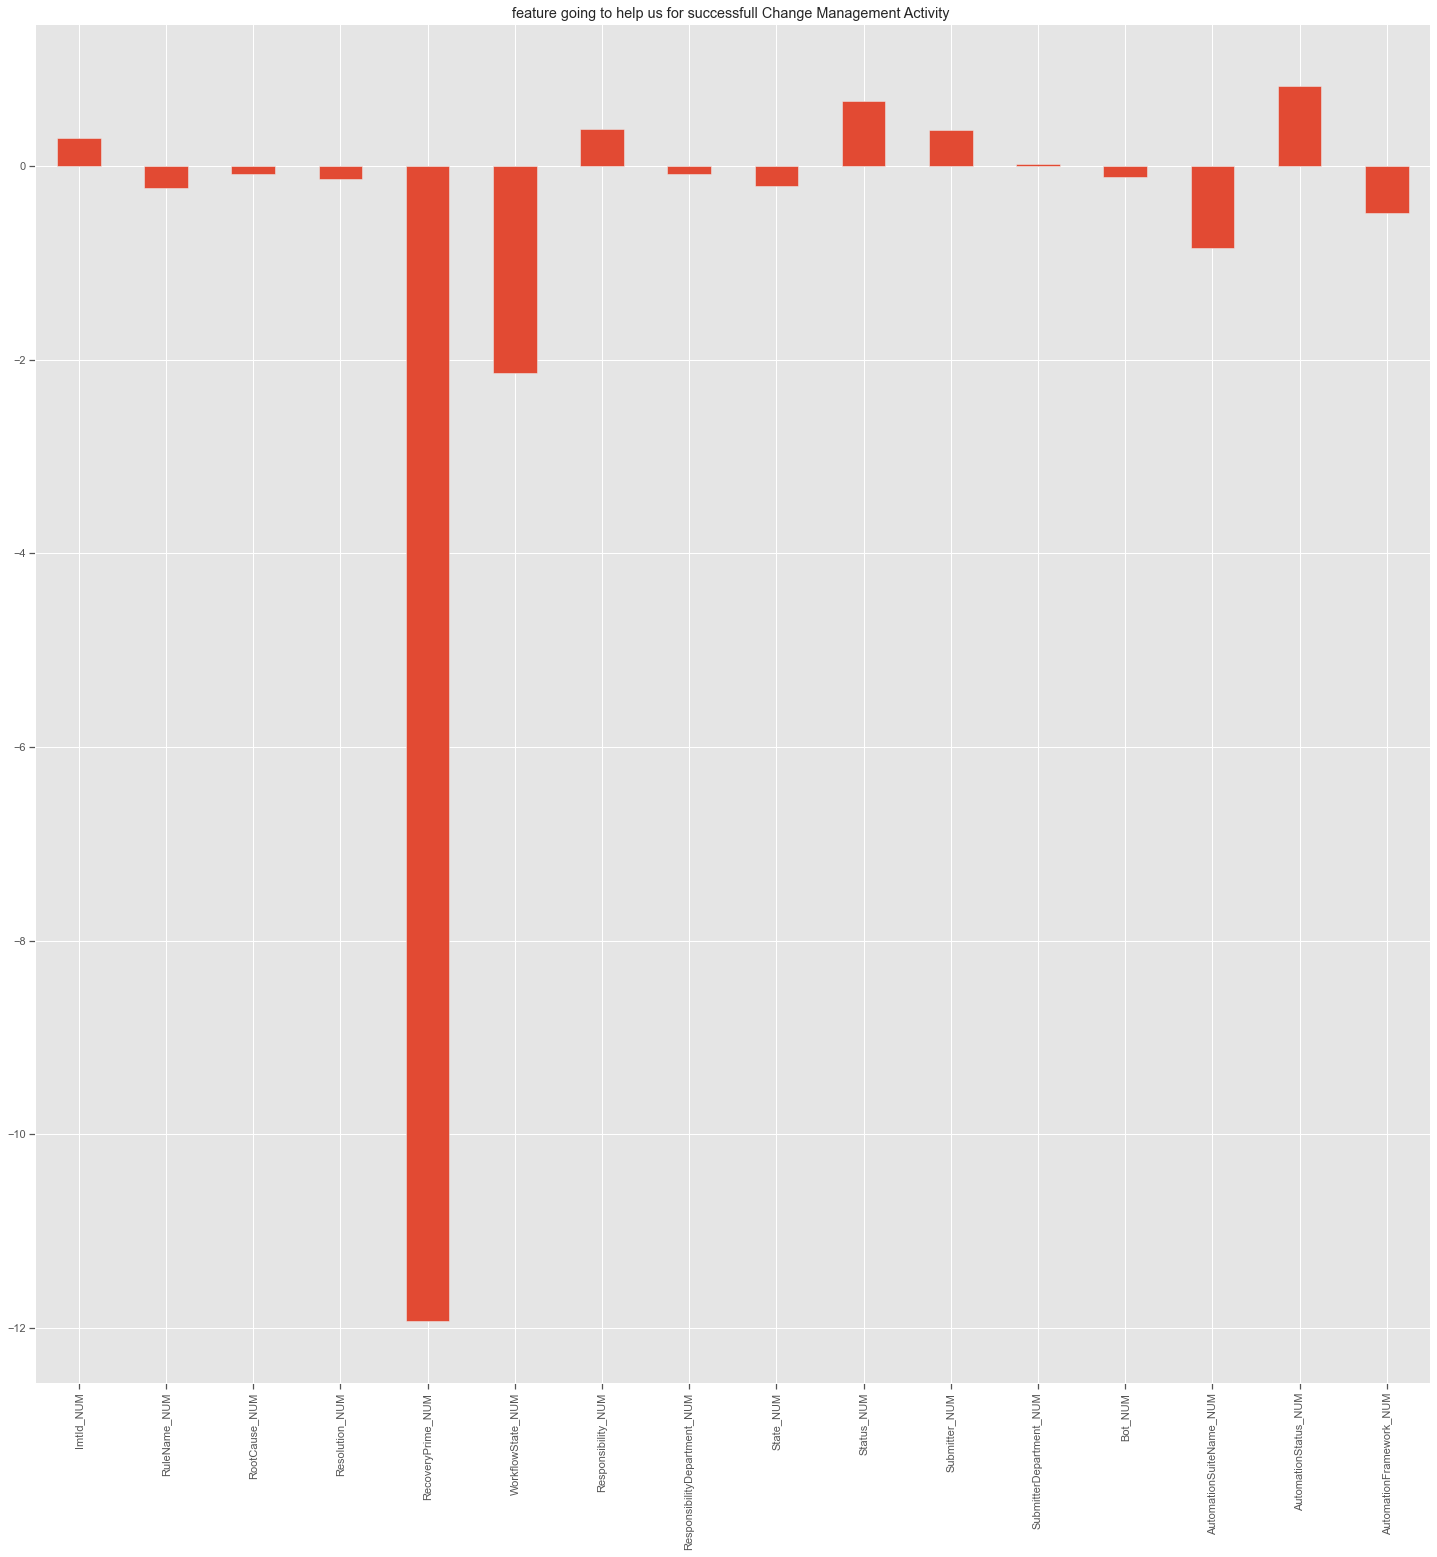

In [166]:
plt.rcParams['figure.figsize']=25,25

plt.style.use('ggplot')
weights=pd.Series(log_reg.coef_[0], index=['ImtId_NUM', 'RuleName_NUM', 'RootCause_NUM',
       'Resolution_NUM', 'RecoveryPrime_NUM', 'WorkflowState_NUM',
       'Responsibility_NUM', 'ResponsibilityDepartment_NUM', 'State_NUM',
       'Status_NUM', 'Submitter_NUM', 'SubmitterDepartment_NUM', 'Bot_NUM',
       'AutomationSuiteName_NUM', 'AutomationStatus_NUM',
       'AutomationFramework_NUM'])

params_weight =weights.plot(kind='bar', title='feature going to help us for successfull Change Management Activity ')
fig=params_weight.get_figure()
plt.show()

In [167]:
predDf = pd.DataFrame({'Responsibility_NUM':df_Responsibility_M,
                       'RootCause_NUM':df_RootCause_M ,
                       'RootCause_NUM':pred_adab_o
                       
                      })
predDf

,Responsibility_NUM,RootCause_NUM
0,Ops Cable and Wireless Ontario,5.0
1,NOC,5.0
2,Ops Cable and Wireless GTA,2.0
3,NOC,0.0
4,NOC,4.0
...,...,...
96996,Ops Cable and Wireless Ontario,NaN
96997,NOC,NaN
96998,NOC,NaN
96999,NOC,NaN


In [168]:
#********************************************************************************************************************

###### Parameters that impact on Change Managment Activity:

-State

-WorkflowState

-Resolution

-Create Date

-Submitter

-Recovery Prime

-Responsibility Department

-Automation Suite Name

-Bot

-Responsibility

##############################################################################################################################
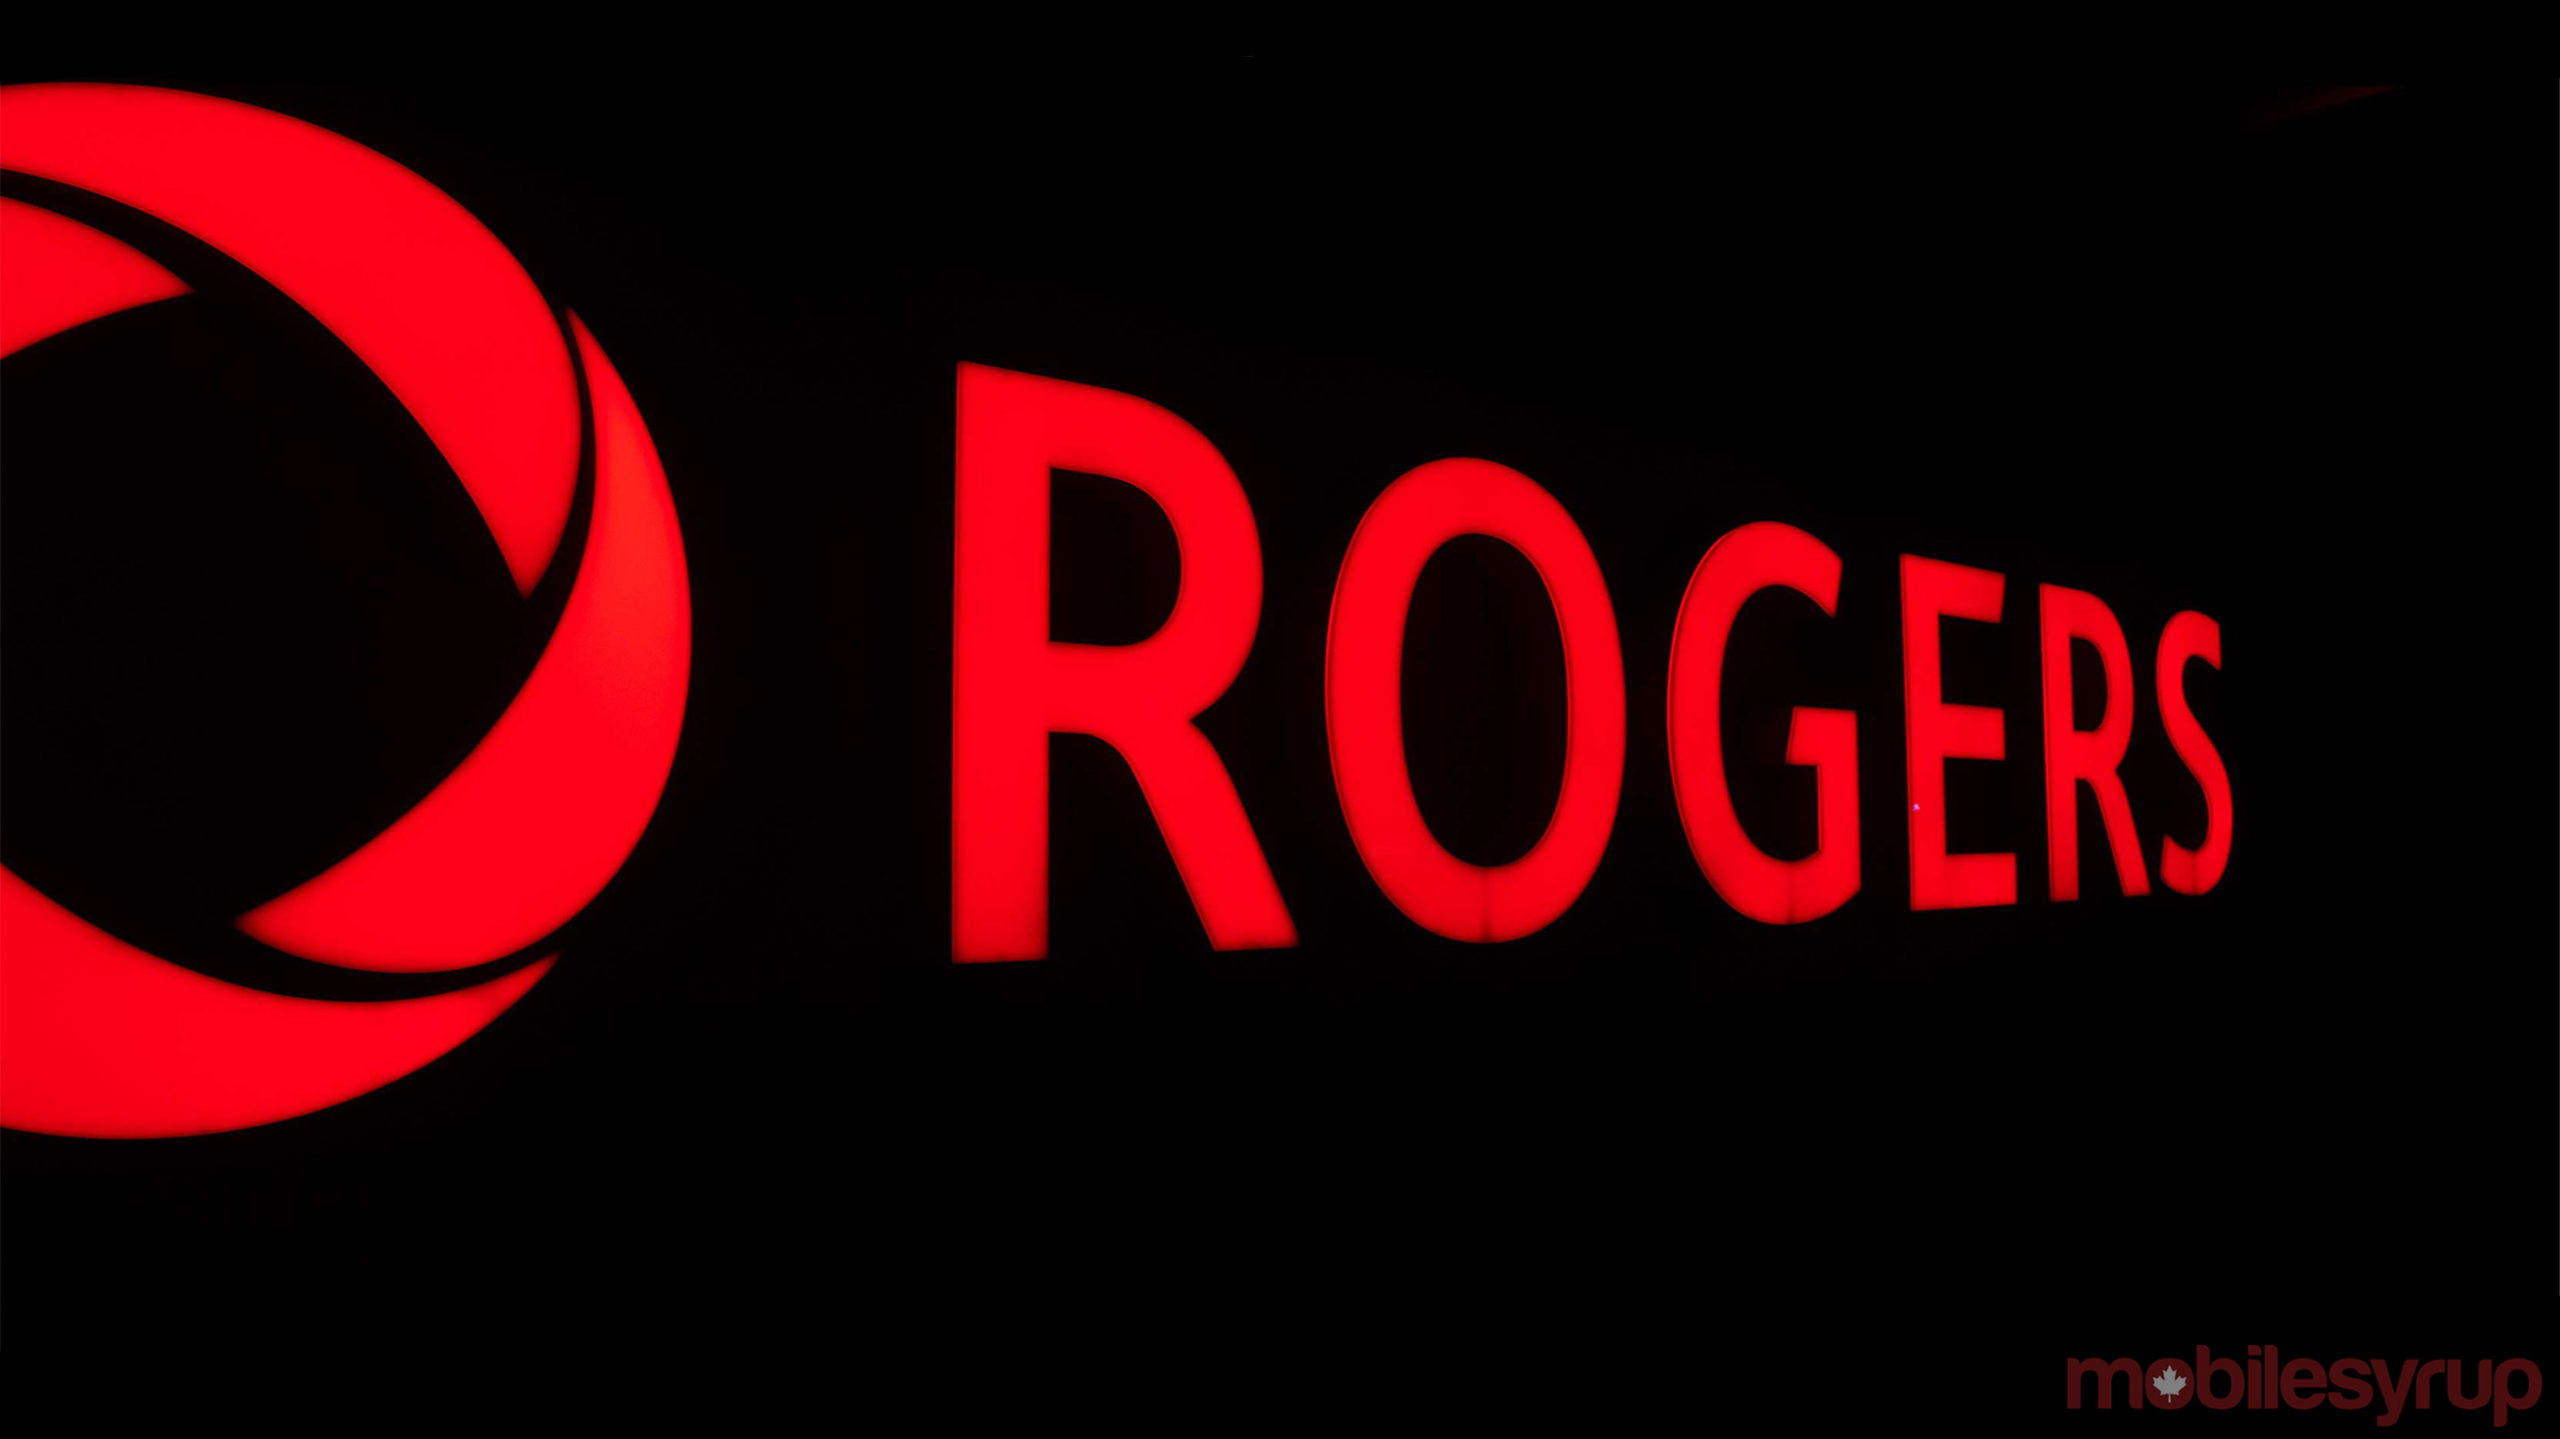
##############################################################################################################################